#Install Library Pytorch-TabNet

In [1]:
!pip install pytorch-tabnet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


#Load Data

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/[SEER Part 4] Colorectal Cancer Survival 2018-2022.csv'

try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    df.rename(columns={'Age recode with <1 year olds and 90+': 'Age (15-90+)'}, inplace=True)
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!


Patient ID Age (15-90+)                  Race recode (White, Black, Other)  \
0        1536  45-49 years  Other (American Indian/AK Native, Asian/Pacifi...   
1        3441  75-79 years                                              White   
2        3868  80-84 years                                              White   
3        4111  80-84 years                                              White   
4        5437  60-64 years                                              White   

      Sex  Year of diagnosis     Marital status at diagnosis  Primary Site  \
0  Female               2019  Married (including common law)           184   
1    Male               2021          Single (never married)           209   
2    Male               2018                         Widowed           186   
3  Female               2019                         Widowed           187   
4  Female               2018                        Divorced           187   

   Histologic Type ICD-O-3 Behavior code ICD-O-3 Diagnostic Confirmation  ...  \
0                     8140             Malignant      Positive histology  ...   
1                     8140             Malignant      Positive histology  ...   
2                     8140             Malignant      Positive histology  ...   
3                     8140             Malignant      Positive histology  ...   
4                     8140             Malignant      Positive histology  ...   

  EOD Regional Nodes Recode (2018+) EOD Mets Recode (2018+)  \
0                               300                       0   
1                               800                       0   
2                               999                       0   
3                                 0                      40   
4                                 0                       0   

  Median household income inflation adj to 2023  \
0                                     $120,000+   
1                                     $120,000+   
2                                     $120,000+   
3                                     $120,000+   
4                                     $120,000+   

                        Rural-Urban Continuum Code  \
0  Counties in metropolitan areas ge 1 million pop   
1  Counties in metropolitan areas ge 1 million pop   
2  Counties in metropolitan areas ge 1 million pop   
3  Counties in metropolitan areas ge 1 million pop   
4  Counties in metropolitan areas ge 1 million pop   

  First malignant primary indicator  \
0                                No   
1                                No   
2                                No   
3                                No   
4                               Yes   

  Derived EOD 2018 Stage Group Recode (2018+)  Grade Pathological (2018+)  \
0                                          3B                           2   
1                                          99                           9   
2                                          99                           9   
3                                          4B                           9   
4                                           1                           2   

  Grade Clinical (2018+) Tumor Size Summary (2016+)  \
0                      9                         27   
1                      1                         40   
2                      1                        999   
3                      2                         50   
4                      9                         22   

  SEER cause-specific death classification  
0             Alive or dead of other cause  
1    Dead (attributable to this cancer dx)  
2             Alive or dead of other cause  
3    Dead (attributable to this cancer dx)  
4             Alive or dead of other cause  

[5 rows x 34 columns]

#EDA

Performing Exploratory Data Analysis (EDA)...

Removed 'Dead (missing/unknown COD)' rows for EDA. New shape: (54253, 34)

Distribution of Key Categorical Variables:


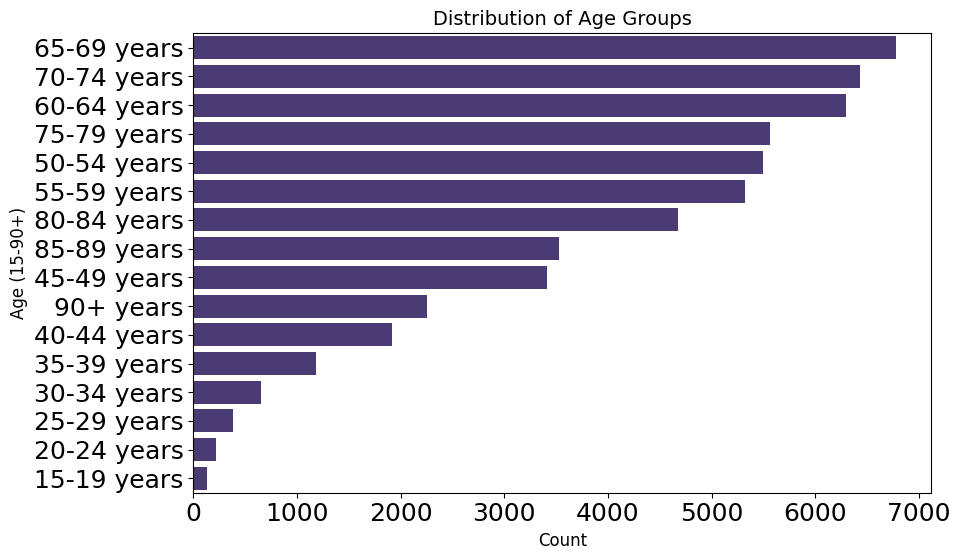

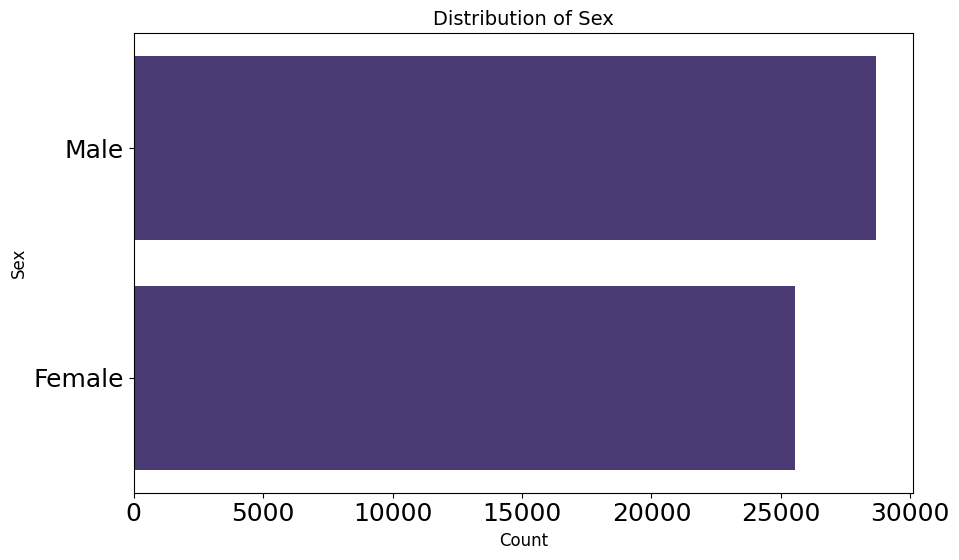

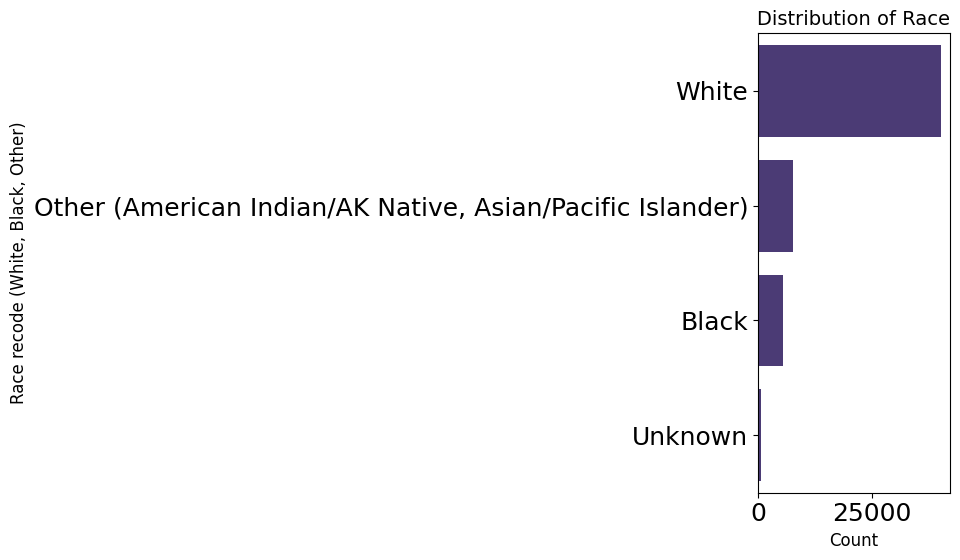

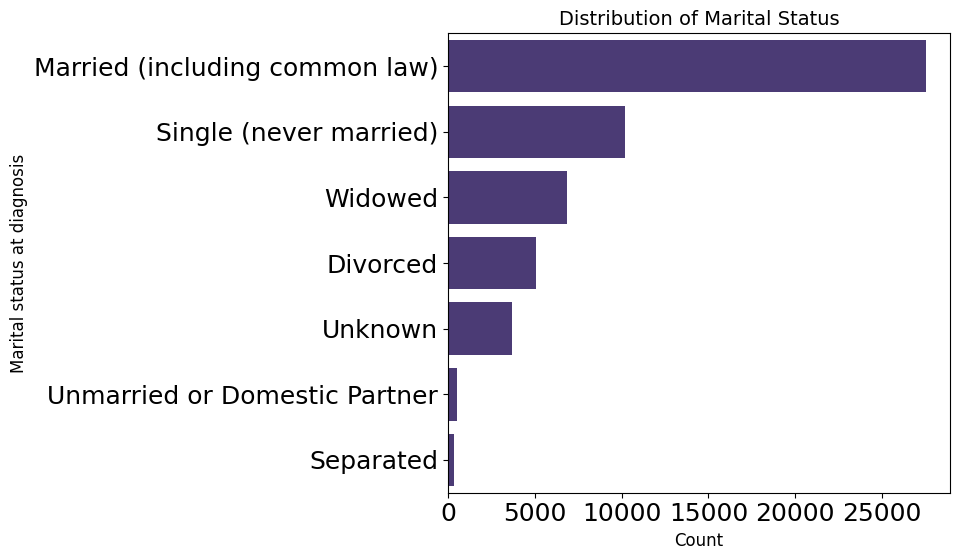

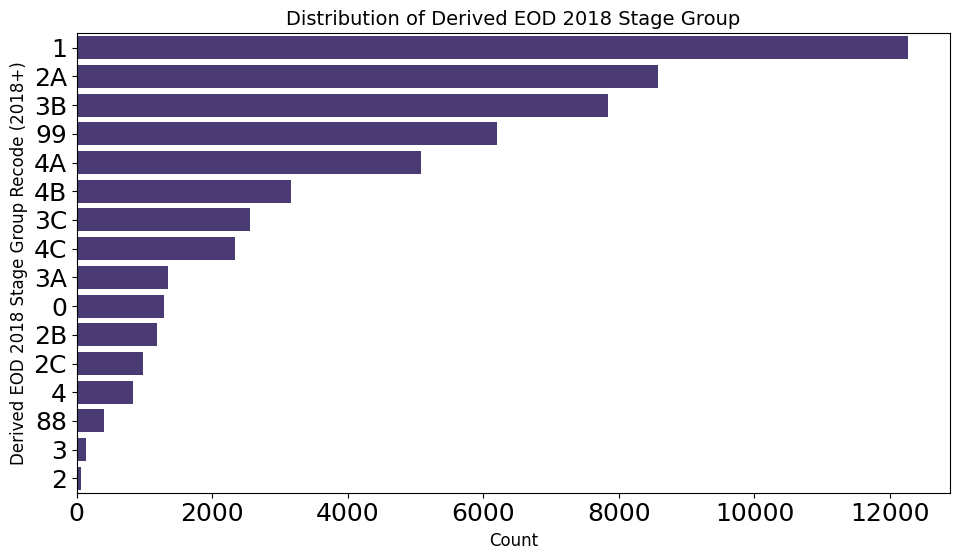

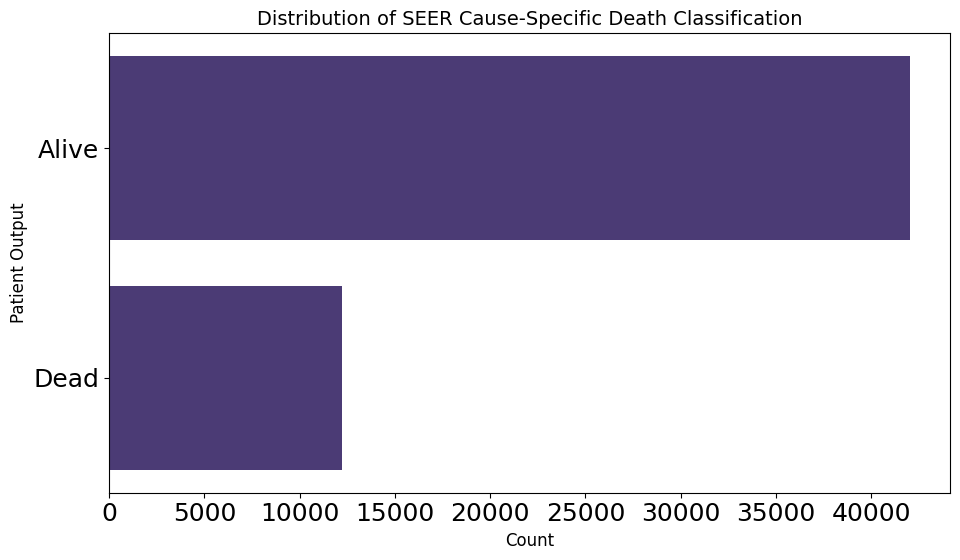


Distribution of Key Numerical Variables:


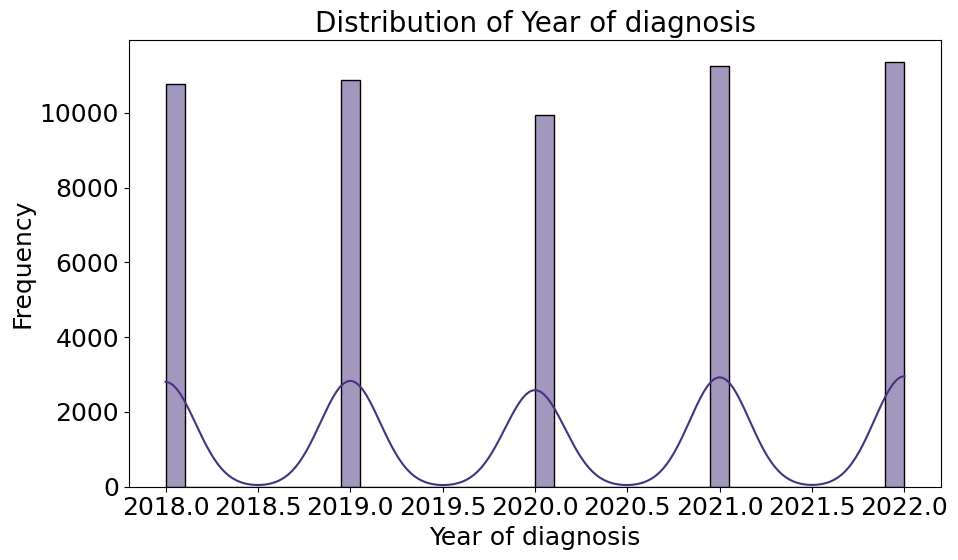

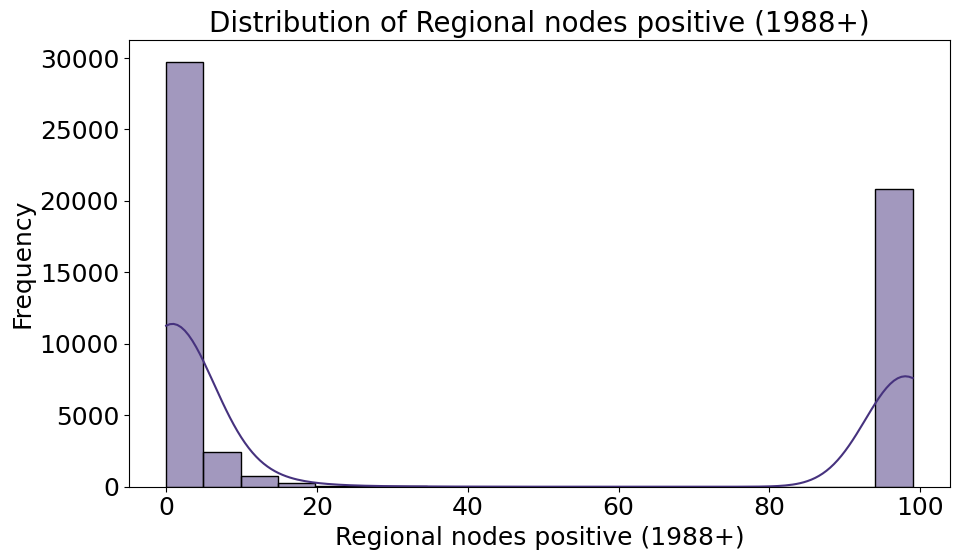

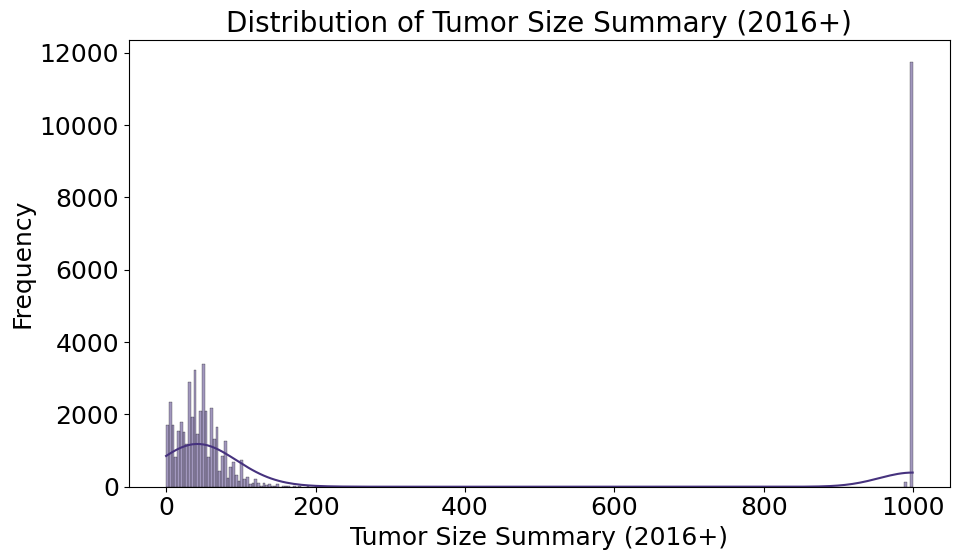


Relationship between Key Variables and Survival:


<Figure size 1200x700 with 0 Axes>

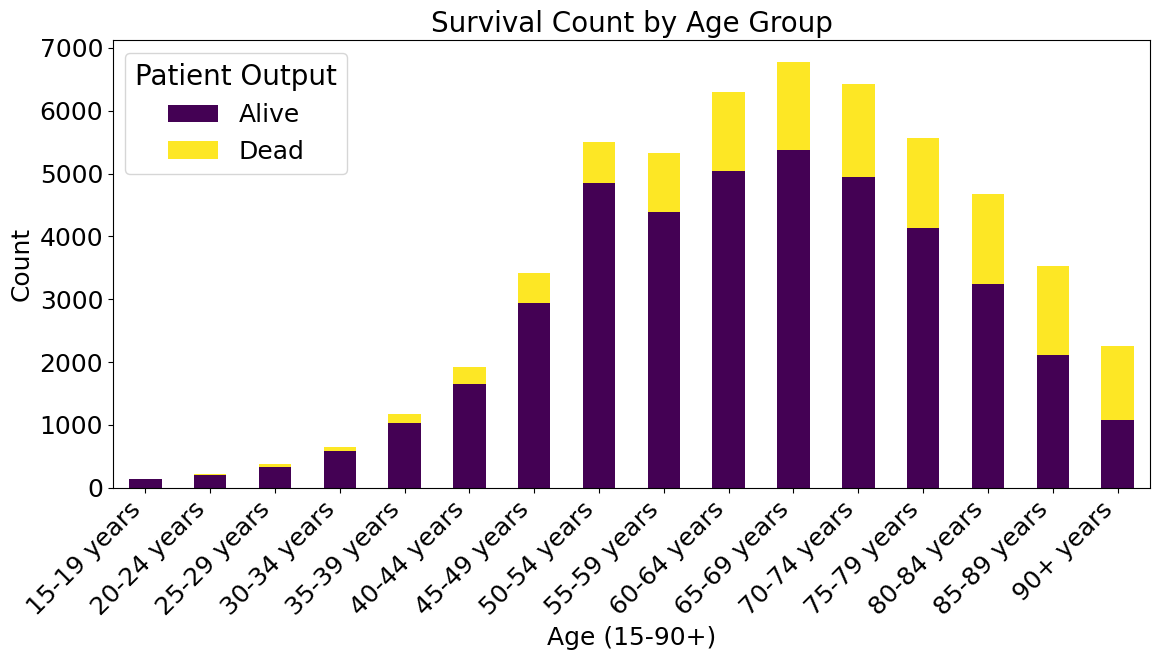

<Figure size 1200x700 with 0 Axes>

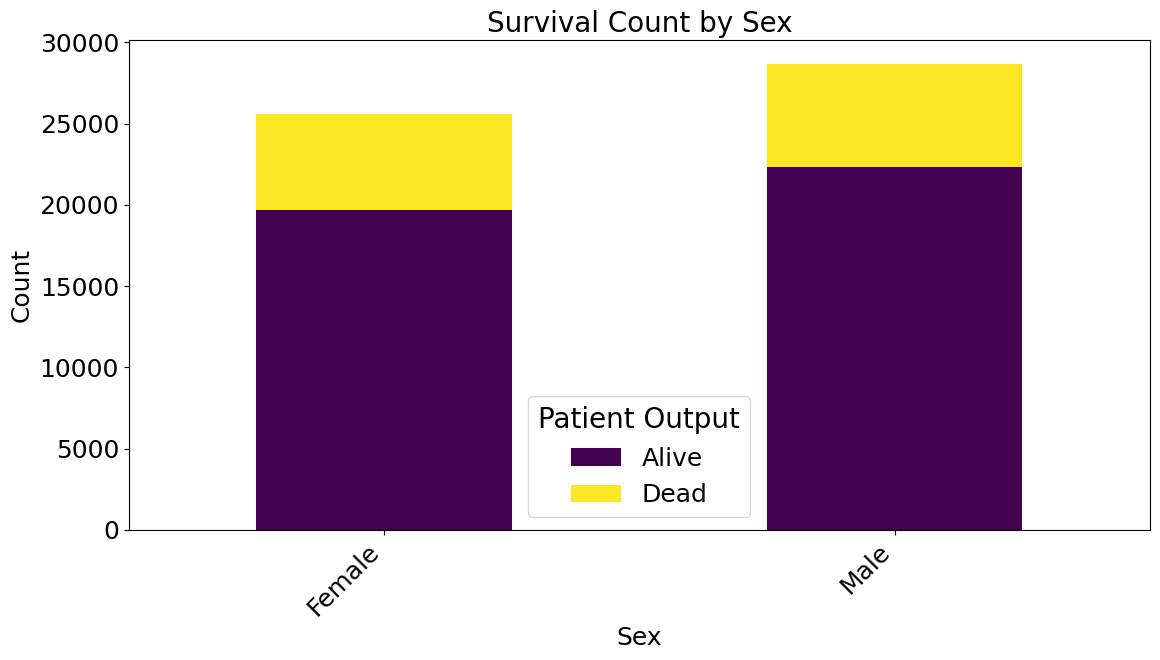

<Figure size 1200x700 with 0 Axes>

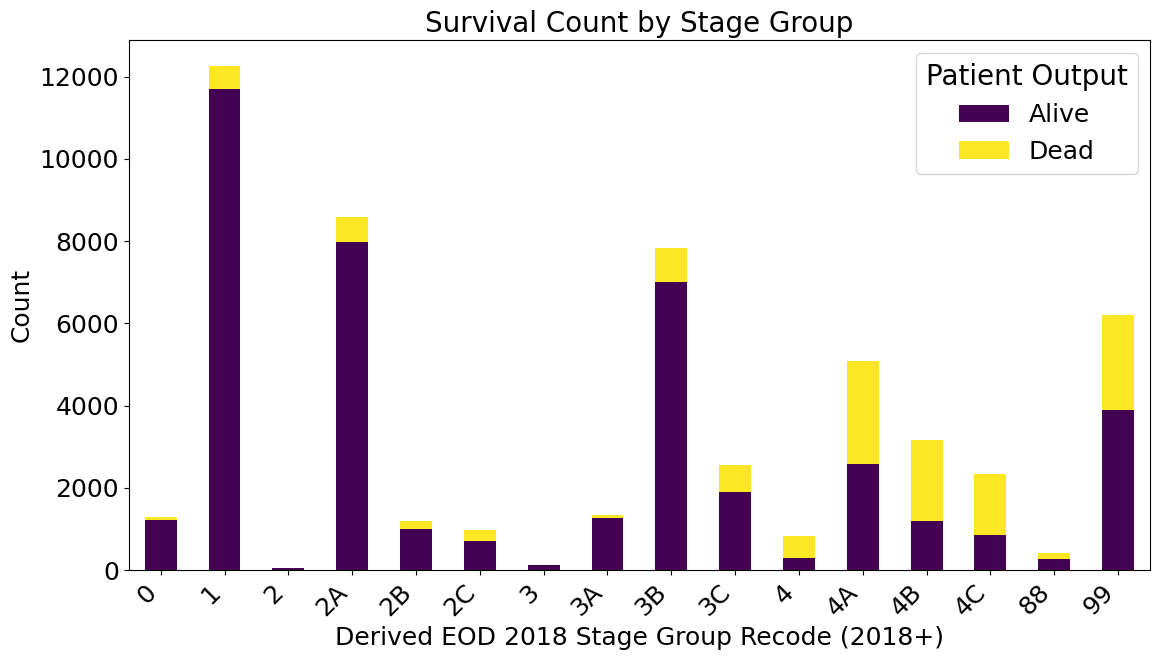

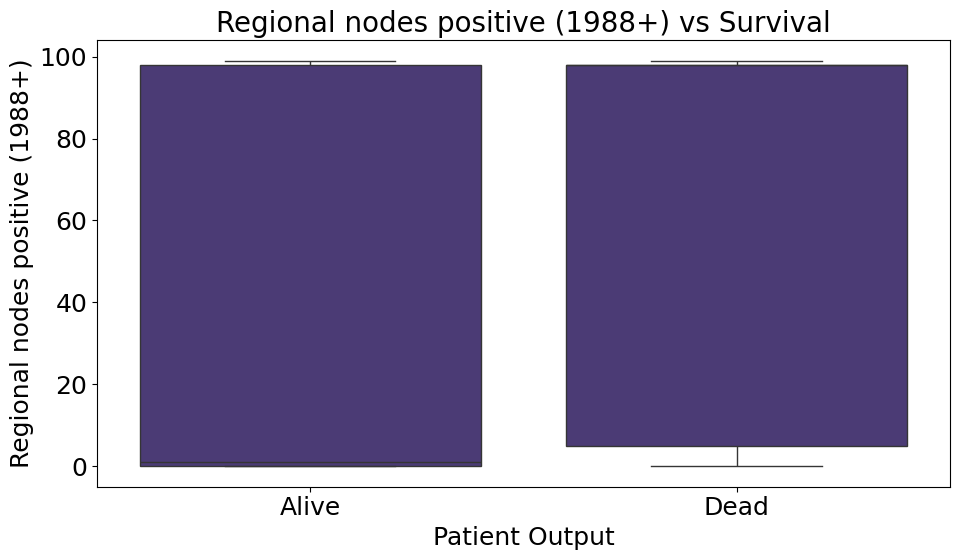

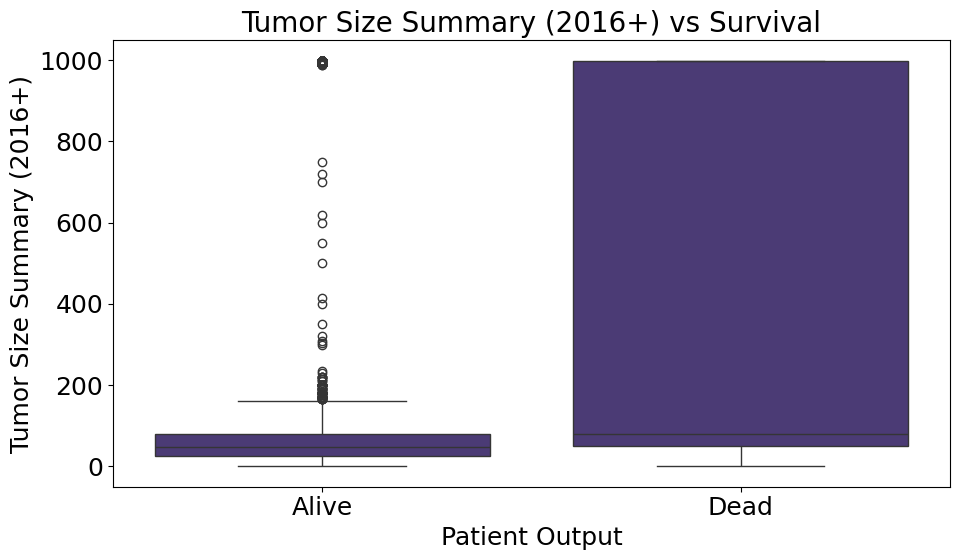


Correlation Matrix for Numerical Variables:


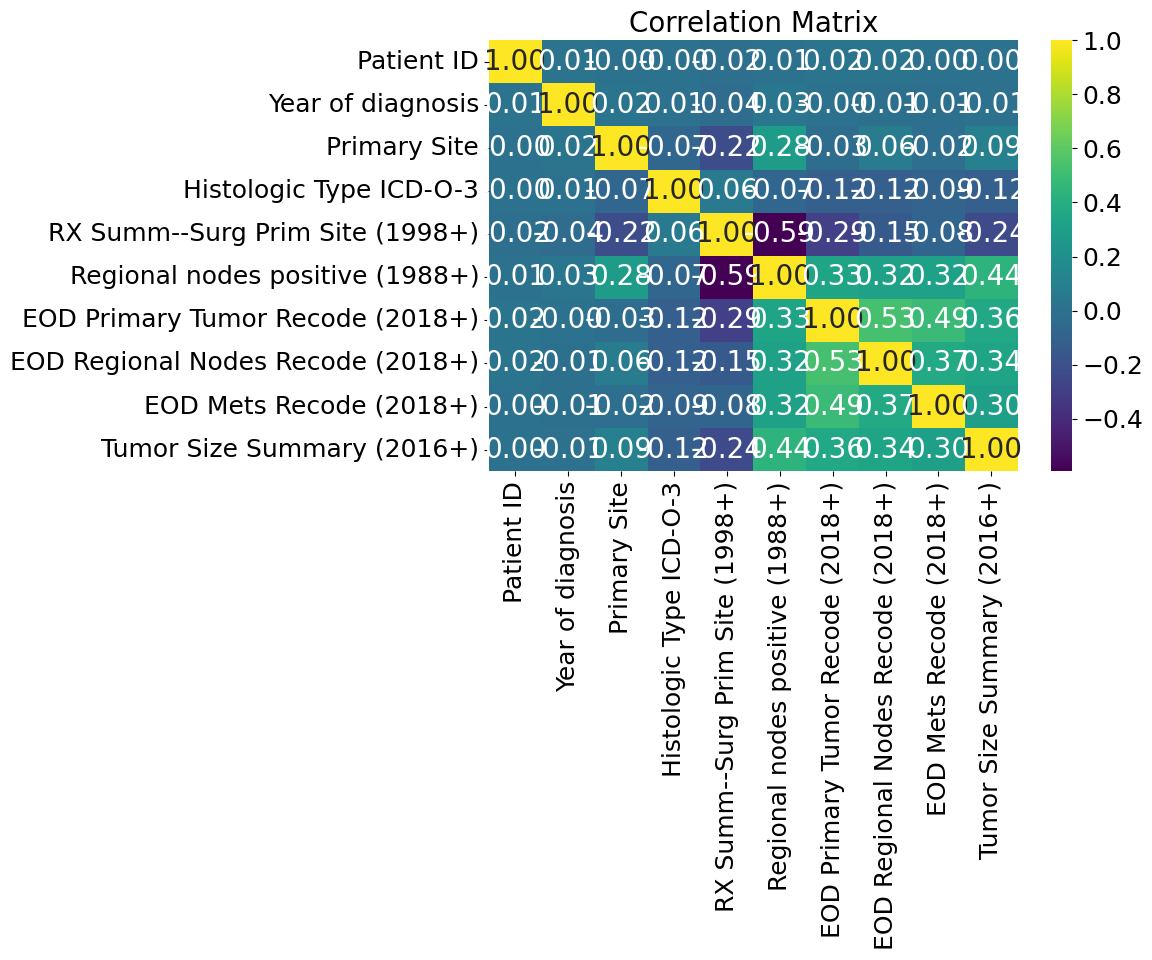


EDA Complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 20,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18
})

sns.set_palette("viridis")

print("Performing Exploratory Data Analysis (EDA)...")

df_filtered_for_eda = df[df['SEER cause-specific death classification'] != 'Dead (missing/unknown COD)'].copy()
print(f"\nRemoved 'Dead (missing/unknown COD)' rows for EDA. New shape: {df_filtered_for_eda.shape}")

df_filtered_for_eda["Patient Output"] = df_filtered_for_eda["SEER cause-specific death classification"].map({
    "Alive or dead of other cause": "Alive",
    "Dead (attributable to this cancer dx)": "Dead"
})

# --- 1. Distribution of Key Categorical Variables ---
print("\nDistribution of Key Categorical Variables:")
def create_count_plot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=column, order=data[column].value_counts().index)
    plt.title(title, fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.tight_layout()
    plt.show()

create_count_plot(df_filtered_for_eda, 'Age (15-90+)', 'Distribution of Age Groups')
create_count_plot(df_filtered_for_eda, 'Sex', 'Distribution of Sex')
create_count_plot(df_filtered_for_eda, 'Race recode (White, Black, Other)', 'Distribution of Race')
create_count_plot(df_filtered_for_eda, 'Marital status at diagnosis', 'Distribution of Marital Status')
create_count_plot(df_filtered_for_eda, 'Derived EOD 2018 Stage Group Recode (2018+)', 'Distribution of Derived EOD 2018 Stage Group')
create_count_plot(df_filtered_for_eda, 'Patient Output', 'Distribution of SEER Cause-Specific Death Classification')


# --- 2. Distribution of Key Numerical Variables ---
print("\nDistribution of Key Numerical Variables:")
def create_histogram(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(title, fontsize=20)
    plt.xlabel(column, fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.tight_layout()
    plt.show()

numerical_cols_for_hist = df_filtered_for_eda.select_dtypes(include=np.number).columns

hist_cols = [
    'Year of diagnosis',
    'Time from diagnosis to treatment in days recode',
    'Regional nodes positive (1988+)',
    'Tumor Size Summary (2016+)'
]

for col in hist_cols:
    if col in numerical_cols_for_hist:
        create_histogram(df_filtered_for_eda, col, f'Distribution of {col}')
    else:
        print(f"Warning: Column '{col}' not found in the filtered numerical data.")


# --- 3. Relationship between Key Variables and Target (Survival) ---
print("\nRelationship between Key Variables and Survival:")
def create_stacked_bar(data, column, target, title):
    plt.figure(figsize=(12, 7))

    crosstab_result = pd.crosstab(data[column], data[target])
    crosstab_result.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
    plt.title(title, fontsize=20)
    plt.xlabel(column, fontsize=18)
    plt.ylabel("Count", fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()

create_stacked_bar(df_filtered_for_eda, 'Age (15-90+)', 'Patient Output', 'Survival Count by Age Group')
create_stacked_bar(df_filtered_for_eda, 'Sex', 'Patient Output', 'Survival Count by Sex')
create_stacked_bar(df_filtered_for_eda, 'Derived EOD 2018 Stage Group Recode (2018+)', 'Patient Output', 'Survival Count by Stage Group')


def create_boxplot(data, column, target, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=target, y=column)
    plt.title(title, fontsize=20)
    plt.xlabel(target, fontsize=18)
    plt.ylabel(column, fontsize=18)
    plt.tight_layout()
    plt.show()

boxplot_cols = [
    'Time from diagnosis to treatment in days recode',
    'Regional nodes positive (1988+)',
    'Tumor Size Summary (2016+)'
]

for col in boxplot_cols:
    if col in numerical_cols_for_hist:
        create_boxplot(df_filtered_for_eda, col, 'Patient Output', f'{col} vs Survival')
    else:
        print(f"Warning: Column '{col}' not found in the filtered numerical data for boxplot.")


# --- 4. Correlation Matrix (for numerical variables) ---
print("\nCorrelation Matrix for Numerical Variables:")
numerical_df_filtered = df_filtered_for_eda.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df_filtered.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix", fontsize=20)
plt.tight_layout()
plt.show()

print("\nEDA Complete.")

#Data Preprocessing

##Dropping Irrelevant Features

In [ ]:
df = df.drop(columns=['Patient ID'])

## Missing Value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54485 entries, 0 to 54484
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Patient ID                                       54485 non-null  int64 
 1   Age (15-90+)                                     54485 non-null  object
 2   Race recode (White, Black, Other)                54485 non-null  object
 3   Sex                                              54485 non-null  object
 4   Year of diagnosis                                54485 non-null  int64 
 5   Marital status at diagnosis                      54485 non-null  object
 6   Primary Site                                     54485 non-null  int64 
 7   Histologic Type ICD-O-3                          54485 non-null  int64 
 8   Behavior code ICD-O-3                            54485 non-null  object
 9   Diagnostic Confirmation                

In [ ]:
import numpy as np

df.replace(["Blank(s)"], np.nan, inplace=True)
missing_values = df.isnull().sum()

print("Missing values per column (including 'Blank(s)'):")
display(missing_values)

Missing values per column (including 'Blank(s)'):


Patient ID                                         0
Age (15-90+)                                       0
Race recode (White, Black, Other)                  0
Sex                                                0
Year of diagnosis                                  0
Marital status at diagnosis                        0
Primary Site                                       0
Histologic Type ICD-O-3                            0
Behavior code ICD-O-3                              0
Diagnostic Confirmation                            0
Chemotherapy recode (yes, no/unk)                  0
Radiation recode                                   0
Derived Summary Grade 2018 (2018+)                 0
RX Summ--Surg Prim Site (1998+)                    0
RX Summ--Surg/Rad Seq                              0
Time from diagnosis to treatment in days recode    0
Regional nodes positive (1988+)                    0
SEER Combined Mets at DX-bone (2010+)              0
SEER Combined Mets at DX-liver (2010+)             0
SEER Combined Mets at DX-lung (2010+)              0
Derived EOD 2018 T Recode (2018+)                  0
Derived EOD 2018 N Recode (2018+)                  0
Derived EOD 2018 M Recode (2018+)                  0
EOD Primary Tumor Recode (2018+)                   0
EOD Regional Nodes Recode (2018+)                  0
EOD Mets Recode (2018+)                            0
Median household income inflation adj to 2023      0
Rural-Urban Continuum Code                         0
First malignant primary indicator                  0
Derived EOD 2018 Stage Group Recode (2018+)        0
Grade Pathological (2018+)                         0
Grade Clinical (2018+)                             0
Tumor Size Summary (2016+)                         0
SEER cause-specific death classification           0
dtype: int64

##Duplicate Value

In [ ]:
df.duplicated().sum()

np.int64(0)

##Outlier Value

Checking for outliers in integer columns:


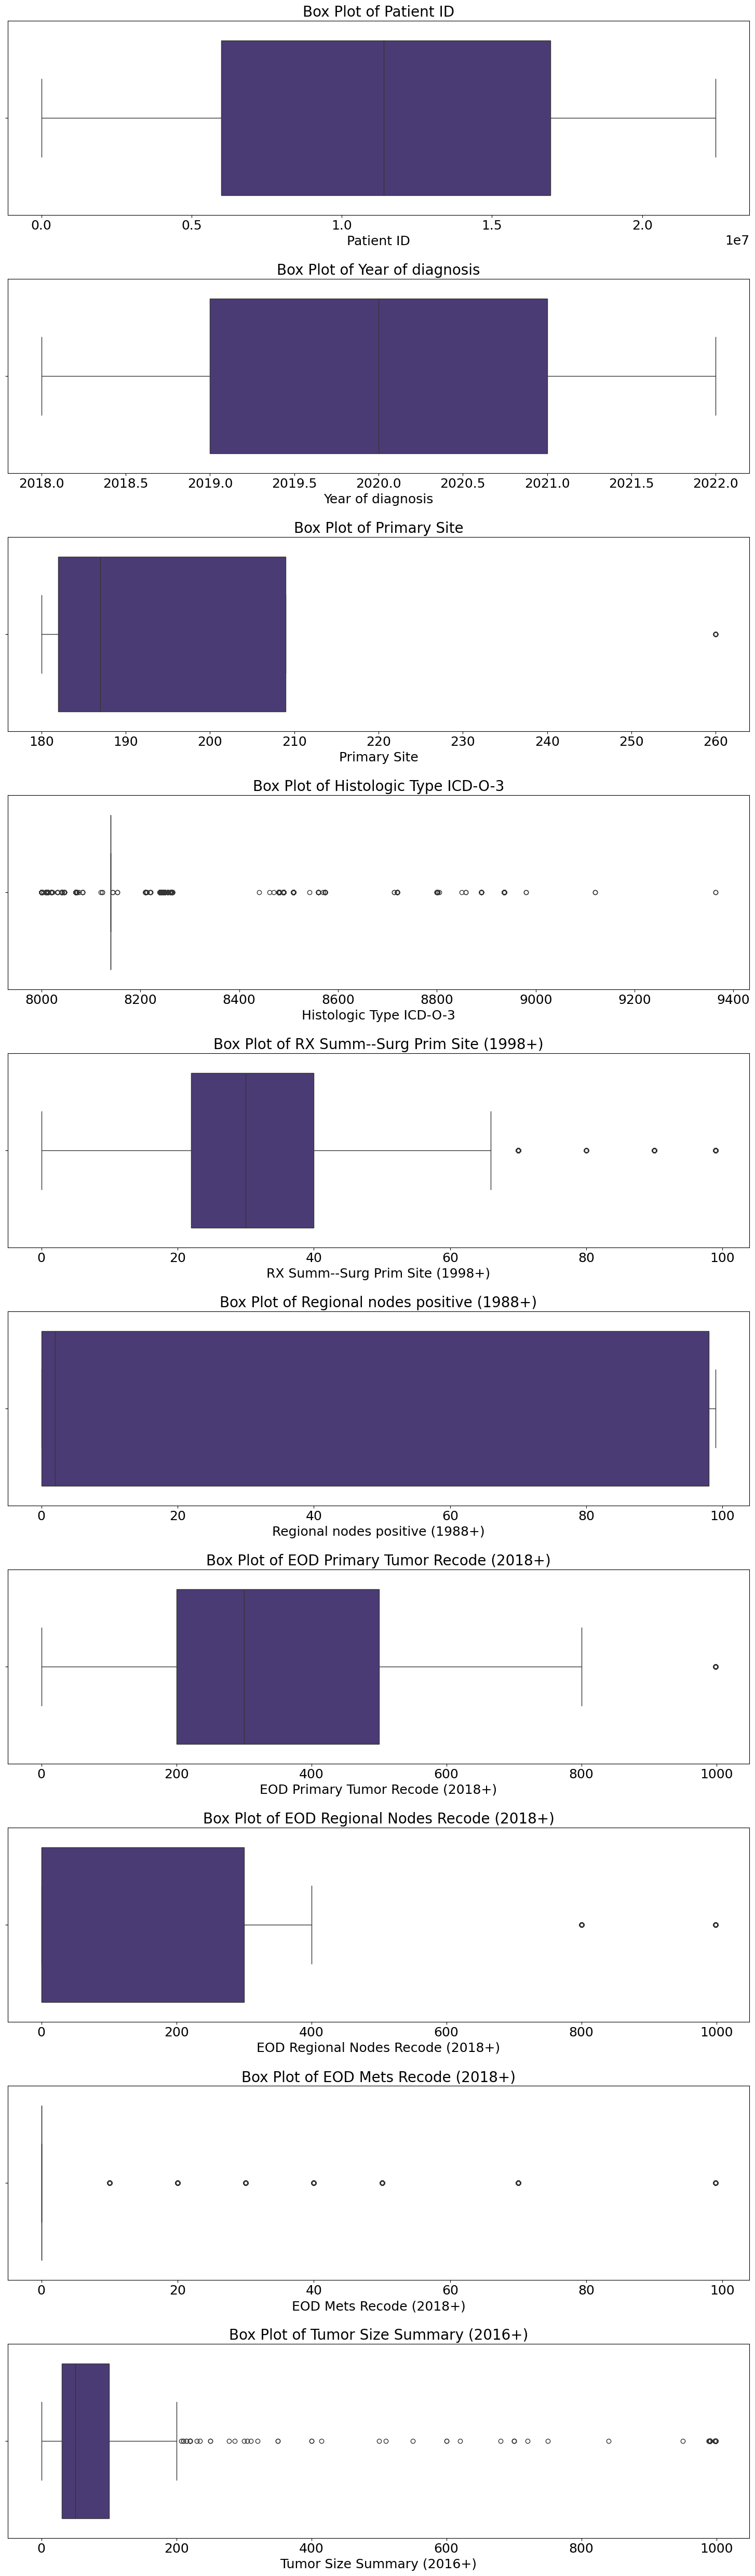

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

int_cols = df.select_dtypes(include='int64').columns

print("Checking for outliers in integer columns:")

plt.figure(figsize=(15, 5 * len(int_cols)))
for i, col in enumerate(int_cols):
    plt.subplot(len(int_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

df = df.drop(columns=['Patient ID'])
df = df[(df['Primary Site'] >= 180) & (df['Primary Site'] <= 209)]
df = df[(df['Histologic Type ICD-O-3'] >= 8000) & (df['Histologic Type ICD-O-3'] <= 9000)]

Checking for outliers in integer columns:


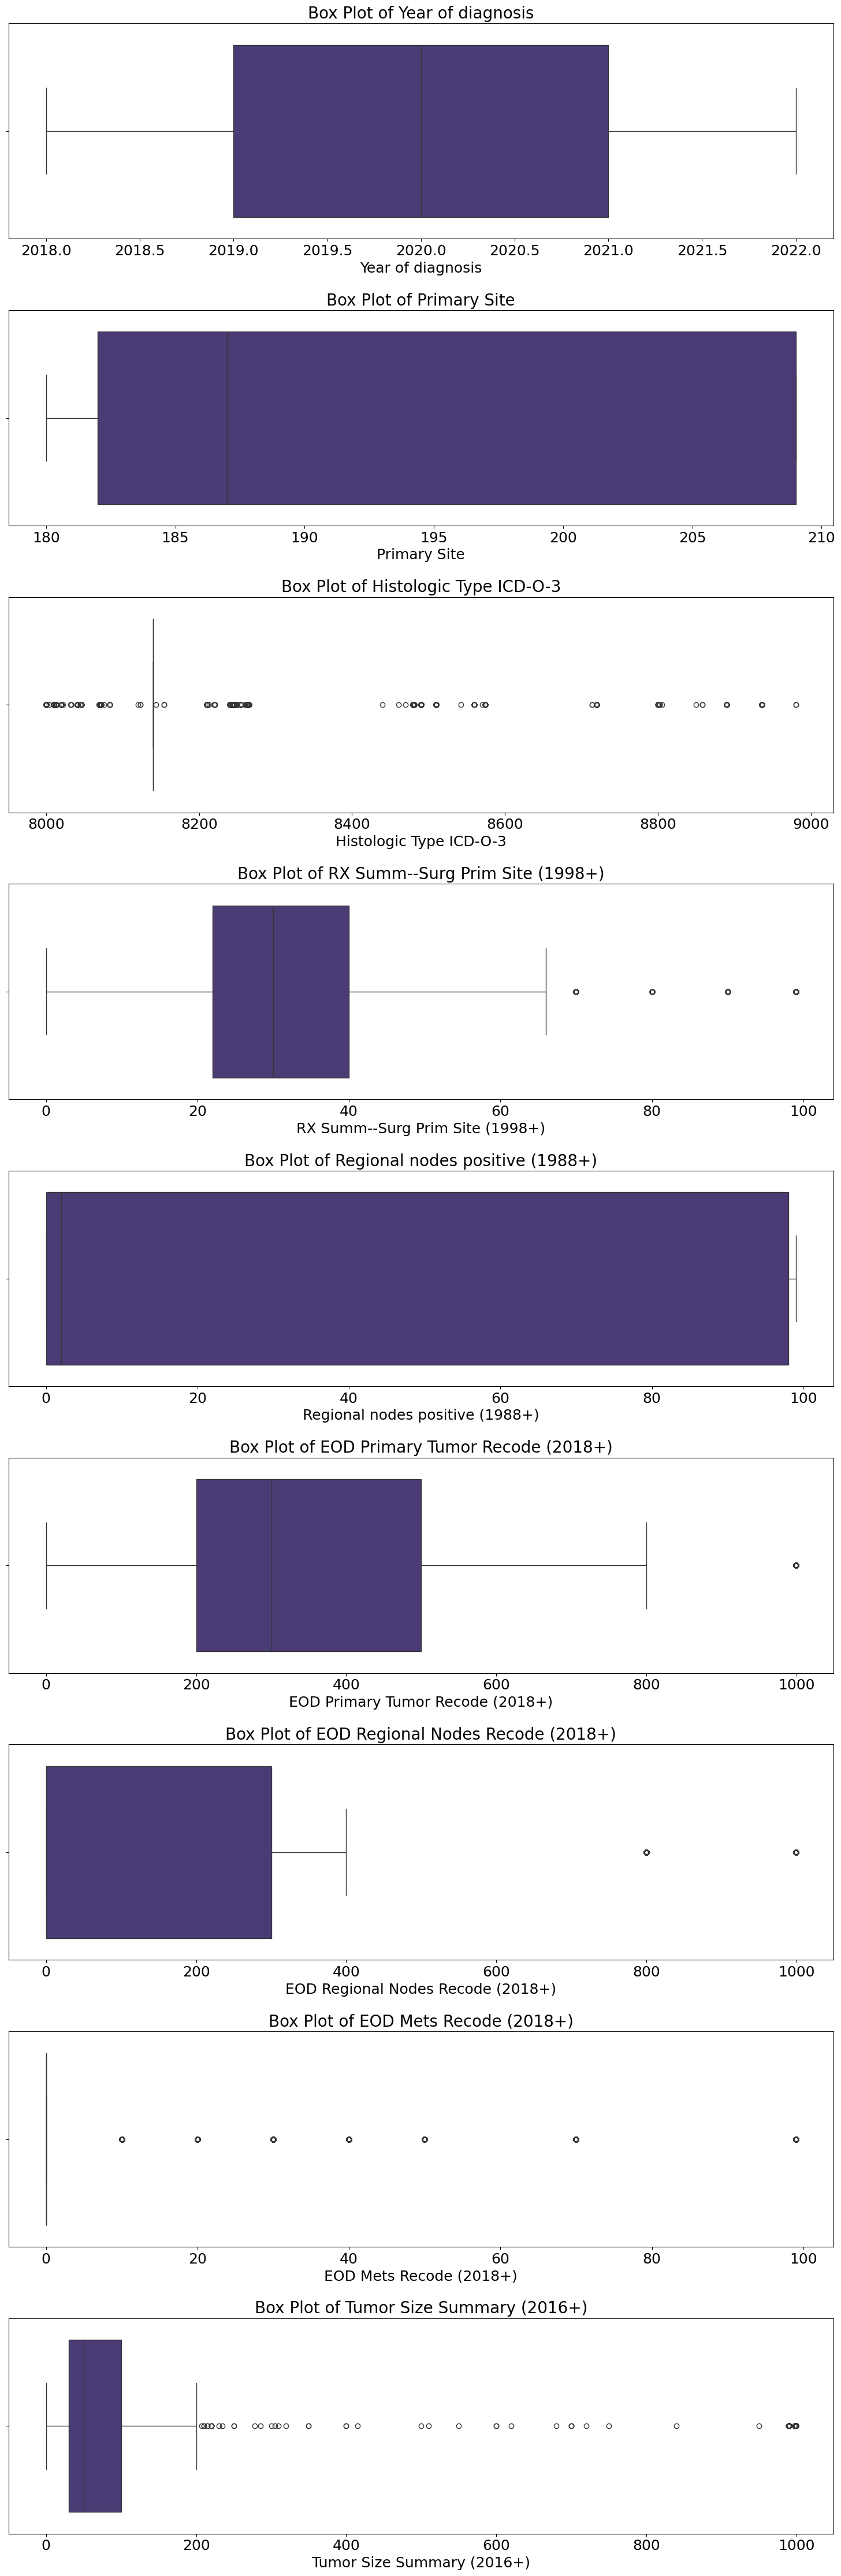

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

int_cols = df.select_dtypes(include='int64').columns

print("Checking for outliers in integer columns:")
plt.figure(figsize=(15, 5 * len(int_cols)))
for i, col in enumerate(int_cols):
    plt.subplot(len(int_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47093 entries, 0 to 54483
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age (15-90+)                                     47093 non-null  object 
 1   Race recode (White, Black, Other)                47093 non-null  object 
 2   Sex                                              47093 non-null  object 
 3   Year of diagnosis                                47093 non-null  int64  
 4   Marital status at diagnosis                      47093 non-null  object 
 5   Primary Site                                     47093 non-null  int64  
 6   Histologic Type ICD-O-3                          47093 non-null  int64  
 7   Behavior code ICD-O-3                            47093 non-null  object 
 8   Diagnostic Confirmation                          47093 non-null  object 
 9   Chemotherapy recode (yes, no/unk)

##Imbalance Data Check

In [ ]:
df = df[df['SEER cause-specific death classification'] != 'Dead (missing/unknown COD)'].copy()

print("Rows with 'Dead (missing/unknown COD)' in the target column removed.")
display(df['SEER cause-specific death classification'].value_counts())

Rows with 'Dead (missing/unknown COD)' in the target column removed.


SEER cause-specific death classification
Alive or dead of other cause             39179
Dead (attributable to this cancer dx)     7745
Name: count, dtype: int64

Proportion of the target variable:


SEER cause-specific death classification
Alive or dead of other cause             0.834946
Dead (attributable to this cancer dx)    0.165054
Name: proportion, dtype: float64

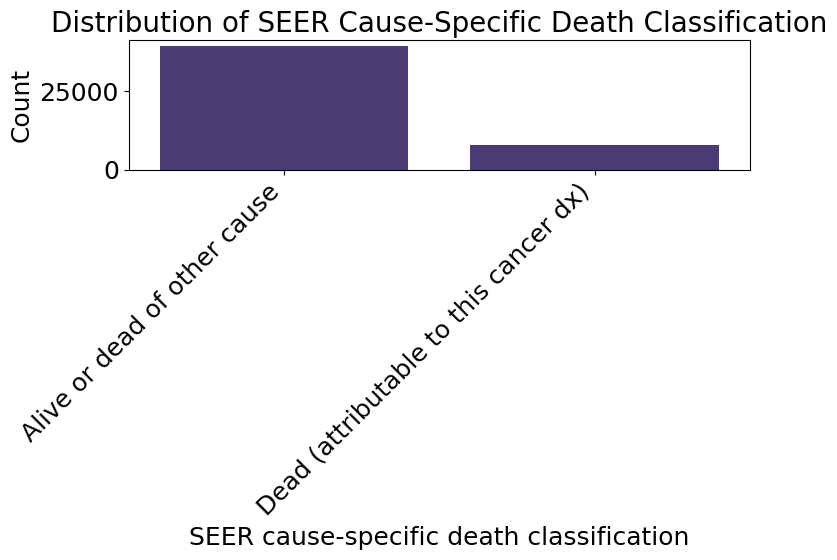

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_proportions = df['SEER cause-specific death classification'].value_counts(normalize=True)
print("Proportion of the target variable:")
display(target_proportions)

plt.figure(figsize=(8, 6))
sns.countplot(x='SEER cause-specific death classification', data=df)
plt.title('Distribution of SEER Cause-Specific Death Classification')
plt.xlabel('SEER cause-specific death classification')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

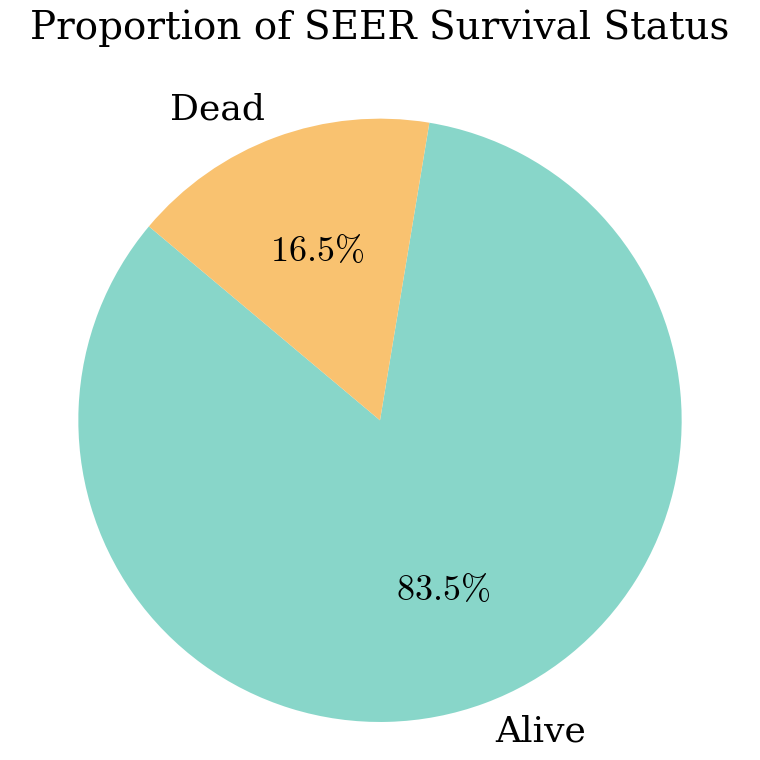

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern", "Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "cm",
    "axes.unicode_minus": False
})

target_proportions = df['SEER cause-specific death classification'].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
plt.pie(
    target_proportions,
    labels=['Alive', 'Dead'],
    autopct=lambda p: rf'${{{p:.1f}\%}}$',
    startangle=140,
    colors=sns.color_palette(['#88D6C9', '#F9C270']),
    textprops={'fontsize': 26}
)

plt.title('Proportion of SEER Survival Status\n',
          fontsize=28, fontweight=540, family='serif')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46924 entries, 0 to 54483
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age (15-90+)                                     46924 non-null  object 
 1   Race recode (White, Black, Other)                46924 non-null  object 
 2   Sex                                              46924 non-null  object 
 3   Year of diagnosis                                46924 non-null  int64  
 4   Marital status at diagnosis                      46924 non-null  object 
 5   Primary Site                                     46924 non-null  int64  
 6   Histologic Type ICD-O-3                          46924 non-null  int64  
 7   Behavior code ICD-O-3                            46924 non-null  object 
 8   Diagnostic Confirmation                          46924 non-null  object 
 9   Chemotherapy recode (yes, no/unk)

##Label Encoding

In [ ]:
import pandas as pd

# =========================
# Mapping Label Encoding
# =========================

label_mappings = {
    'Age (15-90+)': {
        '15-19 years': 0, '20-24 years': 1, '25-29 years': 2, '30-34 years': 3,
        '35-39 years': 4, '40-44 years': 5, '45-49 years': 6, '50-54 years': 7,
        '55-59 years': 8, '60-64 years': 9, '65-69 years': 10, '70-74 years': 11,
        '75-79 years': 12, '80-84 years': 13, '85-89 years': 14, '90+ years': 15
    },

    'Race recode (White, Black, Other)': {
        'White': 0, 'Black': 1, 'Other (American Indian/AK Native, Asian/Pacific Islander)': 2, 'Unknown': 3
    },

    'Sex': {'Female': 0, 'Male': 1},

    'Marital status at diagnosis': {
        'Single (never married)': 0, 'Married (including common law)': 1,
        'Unmarried or Domestic Partner': 2, 'Divorced': 3, 'Separated': 4,
        'Widowed': 5, 'Unknown': 6
    },

    'Behavior code ICD-O-3': {'Malignant': 0},

    'Diagnostic Confirmation': {
        'Positive histology': 0, 'Positive microscopic confirm, method not specified': 1,
        'Direct visualization without microscopic confirmation': 2,
        'Positive exfoliative cytology, no positive histology': 3,
        'Positive laboratory test/marker study': 4,
        'Clinical diagnosis only': 5, 'Radiography without microscopic confirm': 6,
        'Unknown': 7
    },

    'Chemotherapy recode (yes, no/unk)': {'No/Unknown': 0, 'Yes': 1},

    'Radiation recode': {
        'None/Unknown': 0, 'Beam radiation': 1,
        'Combination of beam with implants or isotopes': 2,
        'Radioactive implants (includes brachytherapy) (1988+)': 3,
        'Radioisotopes (1988+)': 4,
        'Radiation, NOS  method or source not specified': 5,
        'Recommended, unknown if administered': 6,
        'Refused (1988+)': 7
    },

    'Derived Summary Grade 2018 (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    'RX Summ--Surg/Rad Seq': {
        'No radiation and/or no surgery; unknown if surgery and/or radiation given': 0,
        'Radiation prior to surgery': 1,
        'Radiation after surgery': 2,
        'Radiation before and after surgery': 3,
        'Intraoperative radiation': 4,
        'Intraoperative rad with other rad before/after surgery': 5,
        'Surgery both before and after radiation': 6,
        'Sequence unknown, but both were given': 7
    },

    'SEER Combined Mets at DX-bone (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},
    'SEER Combined Mets at DX-liver (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},
    'SEER Combined Mets at DX-lung (2010+)': {'No': 0, 'Yes': 1, 'Unknown': 2},

    'Derived EOD 2018 T Recode (2018+)': {
        'Tis': 0, 'Tis(LAMN)': 1, 'T0': 2, 'T1': 3, 'T1a': 4, 'T1b': 5,
        'T2': 6, 'T2b': 7, 'T3': 8, 'T4': 9, 'T4a': 10, 'T4b': 11, 'TX': 12,
        '88': 13
    },

    'Derived EOD 2018 N Recode (2018+)': {
        'N0': 0, 'N1': 1, 'N1a': 2, 'N1b': 3, 'N1c': 4,
        'N2': 5, 'N2a': 6, 'N2b': 7, 'NX': 8, '88': 9
    },

    'Derived EOD 2018 M Recode (2018+)': {
        'M0': 0, 'M1': 1, 'M1a': 2, 'M1b': 3, 'M1c': 4, '88': 5
    },

    'Median household income inflation adj to 2023': {
        '< $40,000': 0, '$40,000 - $44,999': 1, '$45,000 - $49,999': 2,
        '$50,000 - $54,999': 3, '$55,000 - $59,999': 4, '$60,000 - $64,999': 5,
        '$65,000 - $69,999': 6, '$70,000 - $74,999': 7, '$75,000 - $79,999': 8,
        '$80,000 - $84,999': 9, '$85,000 - $89,999': 10, '$90,000 - $94,999': 11,
        '$95,000 - $99,999': 12, '$100,000 - $109,999': 13, '$110,000 - $119,999': 14,
        '$120,000+': 15, 'Unknown/missing/no match/Not 1990-2023': 16
    },

    'Rural-Urban Continuum Code': {
        'Counties in metropolitan areas ge 1 million pop': 0,
        'Counties in metropolitan areas of 250,000 to 1 million pop': 1,
        'Counties in metropolitan areas of lt 250 thousand pop': 2,
        'Nonmetropolitan counties adjacent to a metropolitan area': 3,
        'Nonmetropolitan counties not adjacent to a metropolitan area': 4,
        'Unknown/missing/no match/Not 1990-2023': 5
    },

    'First malignant primary indicator': {'No': 0, 'Yes': 1},

    'Derived EOD 2018 Stage Group Recode (2018+)': {
        '0': 0, '1': 1, '2': 2, '2A': 3, '2B': 4, '2C': 5,
        '3': 6, '3A': 7, '3B': 8, '3C': 9,
        '4': 10, '4A': 11, '4B': 12, '4C': 13,
        '88': 14, '99': 15
    },

    'Grade Pathological (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    'Grade Clinical (2018+)': {
        '1': 0, '2': 1, '3': 2, '4': 3, '9': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'H': 9, 'L': 10
    },

    # ⚠️ Target Variable: Alive = 1, Dead = 0
    'SEER cause-specific death classification': {
        'Dead (attributable to this cancer dx)': 0,
        'Alive or dead of other cause': 1
    }
}

# =========================
# Apply Encoding
# =========================

for col, mapping in label_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
        print(f"✅ Encoded {col}")

# Check result
df.head()

✅ Encoded Age (15-90+)
✅ Encoded Race recode (White, Black, Other)
✅ Encoded Sex
✅ Encoded Marital status at diagnosis
✅ Encoded Behavior code ICD-O-3
✅ Encoded Diagnostic Confirmation
✅ Encoded Chemotherapy recode (yes, no/unk)
✅ Encoded Radiation recode
✅ Encoded Derived Summary Grade 2018 (2018+)
✅ Encoded RX Summ--Surg/Rad Seq
✅ Encoded SEER Combined Mets at DX-bone (2010+)
✅ Encoded SEER Combined Mets at DX-liver (2010+)
✅ Encoded SEER Combined Mets at DX-lung (2010+)
✅ Encoded Derived EOD 2018 T Recode (2018+)
✅ Encoded Derived EOD 2018 N Recode (2018+)
✅ Encoded Derived EOD 2018 M Recode (2018+)
✅ Encoded Median household income inflation adj to 2023
✅ Encoded Rural-Urban Continuum Code
✅ Encoded First malignant primary indicator
✅ Encoded Derived EOD 2018 Stage Group Recode (2018+)
✅ Encoded Grade Pathological (2018+)
✅ Encoded Grade Clinical (2018+)
✅ Encoded SEER cause-specific death classification


Age (15-90+)  Race recode (White, Black, Other)  Sex  Year of diagnosis  \
0             6                                  2    0               2019   
1            12                                  0    1               2021   
4             9                                  0    0               2018   
7             9                                  2    0               2019   
8            13                                  0    1               2020   

   Marital status at diagnosis  Primary Site  Histologic Type ICD-O-3  \
0                            1           184                     8140   
1                            0           209                     8140   
4                            3           187                     8140   
7                            6           209                     8140   
8                            1           209                     8140   

   Behavior code ICD-O-3  Diagnostic Confirmation  \
0                      0                        0   
1                      0                        0   
4                      0                        0   
7                      0                        0   
8                      0                        0   

   Chemotherapy recode (yes, no/unk)  ...  EOD Regional Nodes Recode (2018+)  \
0                                  1  ...                                300   
1                                  0  ...                                800   
4                                  0  ...                                  0   
7                                  1  ...                                  0   
8                                  0  ...                                  0   

   EOD Mets Recode (2018+)  Median household income inflation adj to 2023  \
0                        0                                             15   
1                        0                                             15   
4                        0                                             15   
7                        0                                             15   
8                        0                                             15   

   Rural-Urban Continuum Code  First malignant primary indicator  \
0                           0                                  0   
1                           0                                  0   
4                           0                                  1   
7                           0                                  0   
8                           0                                  0   

   Derived EOD 2018 Stage Group Recode (2018+)  Grade Pathological (2018+)  \
0                                            8                           1   
1                                           15                           4   
4                                            1                           1   
7                                            3                           1   
8                                            1                           4   

   Grade Clinical (2018+)  Tumor Size Summary (2016+)  \
0                       4                          27   
1                       0                          40   
4                       4                          22   
7                       1                          28   
8                       1                          10   

   SEER cause-specific death classification  
0                                         1  
1                                         0  
4                                         1  
7                                         1  
8                                         1  

[5 rows x 33 columns]

#Train-Validation-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('SEER cause-specific death classification', axis=1)
y = df['SEER cause-specific death classification']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

print("\nData split into training, validation, and test sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

save_dir = '/content/drive/MyDrive/Colorectal_Cancer_Survival_Data_Split/'

import os
os.makedirs(save_dir, exist_ok=True)

X_train.to_csv(os.path.join(save_dir, 'X_train.csv'), index=False)
y_train.to_csv(os.path.join(save_dir, 'y_train.csv'), index=False)
X_val.to_csv(os.path.join(save_dir, 'X_val.csv'), index=False)
y_val.to_csv(os.path.join(save_dir, 'y_val.csv'), index=False)
X_test.to_csv(os.path.join(save_dir, 'X_test.csv'), index=False)
y_test.to_csv(os.path.join(save_dir, 'y_test.csv'), index=False)

print(f"\nSplit data saved to: {save_dir}")

In [5]:
save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
import os
os.makedirs(save_dir, exist_ok=True)

X_train = pd.read_csv(os.path.join(save_dir, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(save_dir, 'y_train.csv')).squeeze()
X_val = pd.read_csv(os.path.join(save_dir, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(save_dir, 'y_val.csv')).squeeze()
X_test = pd.read_csv(os.path.join(save_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(save_dir, 'y_test.csv')).squeeze()

print("Split data loaded successfully from Google Drive.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Split data loaded successfully from Google Drive.
Training set shape: (32846, 32), (32846,)
Validation set shape: (4692, 32), (4692,)
Test set shape: (9386, 32), (9386,)


#Default TabNet


Training Fold 1/5

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5987


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 1 | Acc: 0.4839 | Prec_macro: 0.5270 | Rec_macro: 0.5484 | F1_macro: 0.4426 | AUC: 0.5987

Training Fold 2/5

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.68989


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 2 | Acc: 0.8292 | Prec_macro: 0.6687 | Rec_macro: 0.6397 | F1_macro: 0.6515 | AUC: 0.6899

Training Fold 3/5

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.76946


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 3 | Acc: 0.8164 | Prec_macro: 0.6810 | Rec_macro: 0.7054 | F1_macro: 0.6914 | AUC: 0.7695

Training Fold 4/5

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.79205


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 4 | Acc: 0.8374 | Prec_macro: 0.7058 | Rec_macro: 0.5471 | F1_macro: 0.5478 | AUC: 0.7920

Training Fold 5/5

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.74435


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 5 | Acc: 0.8330 | Prec_macro: 0.6995 | Rec_macro: 0.6923 | F1_macro: 0.6958 | AUC: 0.7443

K-Fold Validation Metrics (evaluated on fold validation):
   Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.483866           0.527009        0.548361    0.442632  0.598700
1     2  0.829198           0.668749        0.639677    0.651456  0.689892
2     3  0.816410           0.680958        0.705409    0.691394  0.769460
3     4  0.837418           0.705751        0.547069    0.547833  0.792046
4     5  0.833004           0.699474        0.692321    0.695762  0.744350

Mean Metrics:
 Fold                 3.000000
Accuracy             0.759979
Precision (Macro)    0.656388
Recall (Macro)       0.626567
F1 (Macro)           0.605815
ROC-AUC              0.718889
dtype: float64

Training Final Model on Full TRAIN SET (default TabNet)...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.4647  | val_0_auc: 0.67538 |  0:00:01s
epoch 1  | loss: 0.35147 | val_0_auc: 0.76748 |  0:00:02s
epoch 2  | loss: 0.33374 | val_0_auc: 0.34358 |  0:00:04s
epoch 3  | loss: 0.32496 | val_0_auc: 0.3399  |  0:00:05s
epoch 4  | loss: 0.32299 | val_0_auc: 0.48018 |  0:00:06s
epoch 5  | loss: 0.31808 | val_0_auc: 0.4893  |  0:00:08s
epoch 6  | loss: 0.31575 | val_0_auc: 0.50235 |  0:00:09s
epoch 7  | loss: 0.31105 | val_0_auc: 0.48536 |  0:00:10s
epoch 8  | loss: 0.3102  | val_0_auc: 0.43351 |  0:00:12s
epoch 9  | loss: 0.30567 | val_0_auc: 0.44591 |  0:00:14s
epoch 10 | loss: 0.30171 | val_0_auc: 0.48534 |  0:00:15s
epoch 11 | loss: 0.29923 | val_0_auc: 0.47053 |  0:00:16s

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.76748


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Evaluating Final Model on TEST SET...

Final Test Metrics (Macro):
Accuracy : 0.8295
Precision (Macro): 0.6864
Recall (Macro)   : 0.6726
F1-Score (Macro) : 0.6790
ROC-AUC          : 0.7551

Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.4819    0.4383    0.4591      1549
           1     0.8909    0.9069    0.8988      7837

    accuracy                         0.8295      9386
   macro avg     0.6864    0.6726    0.6790      9386
weighted avg     0.8234    0.8295    0.8263      9386



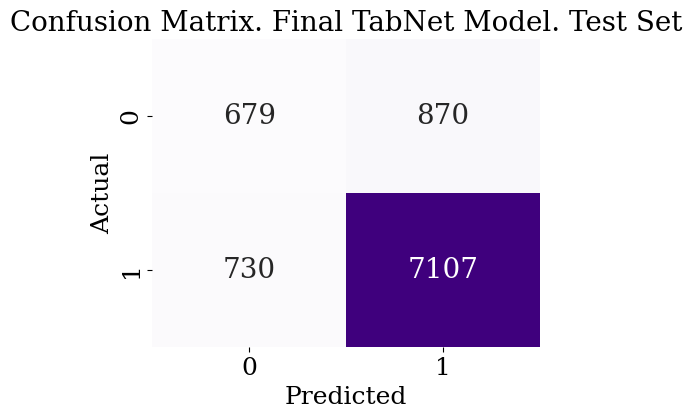

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix
)

X_train_np, y_train_np = X_train.values, y_train.values
X_val_np, y_val_np     = X_val.values, y_val.values
X_test_np, y_test_np   = X_test.values, y_test.values

# === 1) K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np), start=1):
    print(f"\nTraining Fold {fold}/5")

    X_train_fold, y_train_fold = X_train_np[train_idx], y_train_np[train_idx]
    X_val_fold, y_val_fold     = X_train_np[val_idx], y_train_np[val_idx]

    model = TabNetClassifier(
        seed=42 + fold,
        verbose=0
    )

    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_fold, y_val_fold)],
        max_epochs=200,
        patience=20
    )

    y_pred_val = model.predict(X_val_fold)
    y_proba_val = model.predict_proba(X_val_fold)[:, 1]

    report = classification_report(y_val_fold, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_fold, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_fold, y_proba_val)

    fold_metrics.append({
        "Fold": fold,
        "Accuracy": acc,
        "Precision (Macro)": prec_macro,
        "Recall (Macro)": rec_macro,
        "F1 (Macro)": f1_macro,
        "ROC-AUC": auc
    })

    print(
        f"Fold {fold} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
        f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}"
    )

cv_df = pd.DataFrame(fold_metrics)
print("\nK-Fold Validation Metrics (evaluated on fold validation):")
print(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2) LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\nTraining Final Model on Full TRAIN SET (default TabNet)...")
final_model = TabNetClassifier(
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200,
    patience=20
)

# === 3) EVALUASI FINAL MODEL DI TEST SET ===
print("\nEvaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print("\nFinal Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

print("\nClassification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Confusion Matrix. Final TabNet Model. Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Default TabNet Model Parameters:")
params = final_model.get_params()
for param, value in params.items():
    print(f"- {param}: {value}")

Default TabNet Model Parameters:
- cat_dims: []
- cat_emb_dim: []
- cat_idxs: []
- clip_value: 1
- device_name: auto
- epsilon: 1e-15
- gamma: 1.3
- grouped_features: []
- input_dim: 32
- lambda_sparse: 0.001
- mask_type: sparsemax
- momentum: 0.02
- n_a: 8
- n_d: 8
- n_indep_decoder: 1
- n_independent: 2
- n_shared: 2
- n_shared_decoder: 1
- n_steps: 3
- optimizer_fn: <class 'torch.optim.adam.Adam'>
- optimizer_params: {'lr': 0.02}
- output_dim: 2
- scheduler_fn: None
- scheduler_params: {}
- seed: 42
- verbose: 1


# Hyperparameter Tuning for TabNet

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import joblib
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.model_selection import ParameterSampler

N_ITER = 300
CHECKPOINT_FILE = "tabnet_manual_random_search.pkl"
LOG_FILE = "tabnet_manual_log.csv"


param_grid = {
    'n_d': np.arange(8, 33),
    'n_a': np.arange(8, 33),
    'n_steps': np.arange(3, 8),
    'gamma': np.linspace(1.0, 2.0, 11),
    'lambda_sparse': np.logspace(-5, -3, 30),
    'lr': np.logspace(-3, -2, 20)
}

param_samples = list(ParameterSampler(param_grid, n_iter=N_ITER, random_state=42))

if os.path.exists(CHECKPOINT_FILE):
    print("🔁 Melanjutkan tuning dari checkpoint...")
    results = joblib.load(CHECKPOINT_FILE)
    start_idx = len(results)
else:
    print("🚀 Memulai tuning baru...")
    results = []
    start_idx = 0

# LOOP TUNING MANUAL
for i, params in enumerate(param_samples[start_idx:], start=start_idx):
    print(f"\n==============================")
    print(f"🎯 Kombinasi {i+1}/{N_ITER}")
    print(f"Params: {params}")
    print(f"==============================")

    model = TabNetClassifier(
        n_d=params['n_d'],
        n_a=params['n_a'],
        n_steps=params['n_steps'],
        gamma=params['gamma'],
        lambda_sparse=params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=params['lr']),
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42,
        verbose=0
    )

    try:
        model.fit(
            X_train.values, y_train.values,
            eval_set=[(X_val.values, y_val.values)],
            patience=10, max_epochs=100,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0, drop_last=False
        )
        y_pred = model.predict(X_val.values)
        y_proba = model.predict_proba(X_val.values)[:, 1]

        f1 = f1_score(y_val.values, y_pred, average='macro')
        auc = roc_auc_score(y_val.values, y_proba)

        print(f"✅ Hasil: F1={f1:.4f} | ROC-AUC={auc:.4f}")
        results.append({
            **params,
            'F1_macro': f1,
            'ROC_AUC': auc
        })

    except Exception as e:
        print(f"❌ Error: {e}")
        results.append({
            **params,
            'F1_macro': np.nan,
            'ROC_AUC': np.nan
        })
    joblib.dump(results, CHECKPOINT_FILE)
    pd.DataFrame(results).to_csv(LOG_FILE, index=False)
    print(f"💾 Checkpoint disimpan ({i+1}/{N_ITER})")


df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by='F1_macro', ascending=False)
display(df_sorted.head(10))
print(f"\n📁 Log tuning disimpan ke: {LOG_FILE}")


print("\n🏁 Training final TabNet model using best parameters...")
final_tabnet = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_lr),
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_tabnet.fit(
    X_train_resampled_ENN.values,
    y_train_resampled_ENN.values,
    eval_set=[(X_val.values, y_val.values)],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

final_tabnet.save_model("tabnet_best_model.zip")
print("💾 Best model saved → tabnet_best_model.zip")


y_pred = final_tabnet.predict(X_test.values)
y_proba = final_tabnet.predict_proba(X_test.values)[:, 1]

acc  = accuracy_score(y_test.values, y_pred)
prec = precision_score(y_test.values, y_pred, average='macro')
rec  = recall_score(y_test.values, y_pred, average='macro')
f1   = f1_score(y_test.values, y_pred, average='macro')
auc  = roc_auc_score(y_test.values, y_proba)

print("\n📊 Final Model Evaluation (Macro Metrics):")
print(f"Accuracy        : {acc:.4f}")
print(f"Precision (macro): {prec:.4f}")
print(f"Recall (macro)   : {rec:.4f}")
print(f"F1 (macro)       : {f1:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test.values, y_pred, zero_division=0, digits=4))

conf_matrix = confusion_matrix(y_test.values, y_pred)
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix,
                   index=['Actual 0', 'Actual 1'],
                   columns=['Predicted 0', 'Predicted 1']))


🚀 Memulai tuning baru...

🎯 Kombinasi 1/300
Params: {'n_steps': np.int64(6), 'n_d': np.int64(28), 'n_a': np.int64(13), 'lr': np.float64(0.003359818286283781), 'lambda_sparse': np.float64(0.00014873521072935117), 'gamma': np.float64(1.8)}


KeyboardInterrupt: 

🚀 Training Final Model with Specified Hyperparameters...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52866 | val_0_auc: 0.57139 |  0:00:02s
epoch 1  | loss: 0.38686 | val_0_auc: 0.56414 |  0:00:08s
epoch 2  | loss: 0.34852 | val_0_auc: 0.56538 |  0:00:13s
epoch 3  | loss: 0.33495 | val_0_auc: 0.6007  |  0:00:20s
epoch 4  | loss: 0.33364 | val_0_auc: 0.47966 |  0:00:22s
epoch 5  | loss: 0.31704 | val_0_auc: 0.51496 |  0:00:25s
epoch 6  | loss: 0.31361 | val_0_auc: 0.51111 |  0:00:27s
epoch 7  | loss: 0.30828 | val_0_auc: 0.51037 |  0:00:30s
epoch 8  | loss: 0.30242 | val_0_auc: 0.52486 |  0:00:32s
epoch 9  | loss: 0.30064 | val_0_auc: 0.45181 |  0:00:35s
epoch 10 | loss: 0.29843 | val_0_auc: 0.51068 |  0:00:37s
epoch 11 | loss: 0.29485 | val_0_auc: 0.46209 |  0:00:39s
epoch 12 | loss: 0.295   | val_0_auc: 0.4535  |  0:00:41s
epoch 13 | loss: 0.29137 | val_0_auc: 0.55316 |  0:00:44s
epoch 14 | loss: 0.29094 | val_0_auc: 0.58994 |  0:00:47s
epoch 15 | loss: 0.28938 | val_0_auc: 0.65332 |  0:00:49s
epoch 16 | loss: 0.28821 | val_0_auc: 0.76895 |  0:00:51s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Tuned Final Model on TEST SET...

✅ Final Test Metrics (Macro) with Tuned Hyperparameters:
Accuracy : 0.8834
Precision (Macro): 0.8103
Recall (Macro)   : 0.7243
F1-Score (Macro) : 0.7559
ROC-AUC          : 0.8901

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.7160    0.4868    0.5796      1549
           1     0.9046    0.9618    0.9323      7837

    accuracy                         0.8834      9386
   macro avg     0.8103    0.7243    0.7559      9386
weighted avg     0.8735    0.8834    0.8741      9386



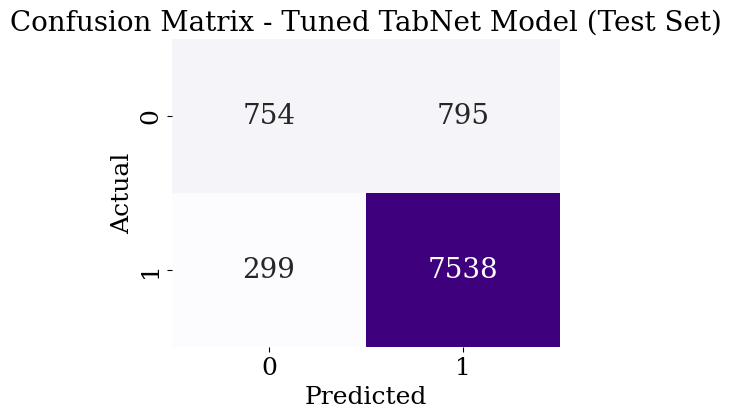


📈 ROC Curve (TEST SET):


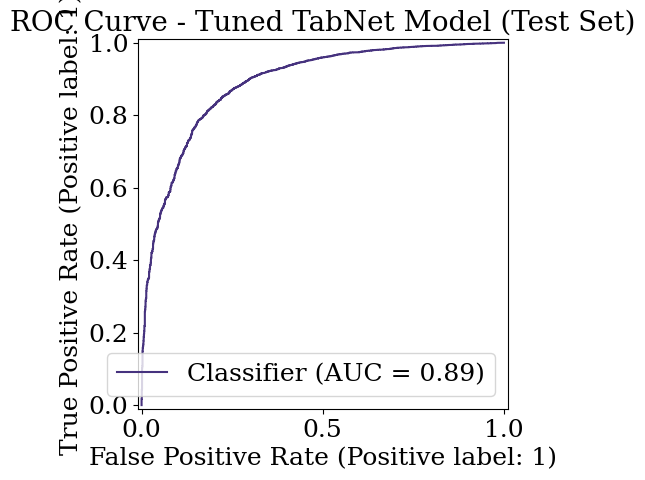

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

best_params = {
    'n_steps': 6,
    'n_d': 16,
    'n_a': 10,
    'lr': 0.008858667904100823,
    'lambda_sparse': 0.00014873521072935117,
    'gamma': 1.0
}

X_train_np, y_train_np = X_train.values, y_train.values
X_test_np, y_test_np = X_test.values, y_test.values

print("🚀 Training Final Model with Specified Hyperparameters...")
final_model_tuned = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']),
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model_tuned.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val.values, y_val.values)],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

print("\n🧪 Evaluating Tuned Final Model on TEST SET...")
y_pred_test = final_model_tuned.predict(X_test_np)
y_proba_test = final_model_tuned.predict_proba(X_test_np)[:, 1]

acc = accuracy_score(y_test_np, y_pred_test)
prec = precision_score(y_test_np, y_pred_test, average='macro', zero_division=0)
rec = recall_score(y_test_np, y_pred_test, average='macro', zero_division=0)
f1 = f1_score(y_test_np, y_pred_test, average='macro', zero_division=0)
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro) with Tuned Hyperparameters:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec:.4f}")
print(f"Recall (Macro)   : {rec:.4f}")
print(f"F1-Score (Macro) : {f1:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Tuned TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n📈 ROC Curve (TEST SET):")
RocCurveDisplay.from_predictions(y_test_np, y_proba_test)
plt.title("ROC Curve - Tuned TabNet Model (Test Set)")
plt.show()


🧩 Evaluating Tuned Model on VALIDATION SET...

✅ Validation Metrics (Macro) with Tuned Hyperparameters:
Accuracy : 0.8894
Precision (Macro): 0.8208
Recall (Macro)   : 0.7423
F1-Score (Macro) : 0.7725
ROC-AUC          : 0.8931

📋 Classification Report (VALIDATION SET):
              precision    recall  f1-score   support

           0     0.7310    0.5226    0.6095       775
           1     0.9106    0.9620    0.9356      3917

    accuracy                         0.8894      4692
   macro avg     0.8208    0.7423    0.7725      4692
weighted avg     0.8809    0.8894    0.8817      4692



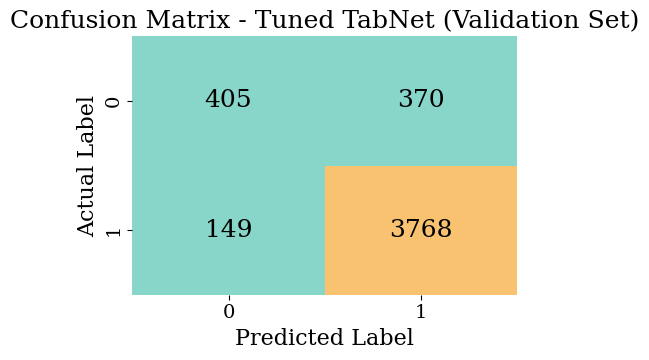


📈 ROC Curve (VALIDATION SET):


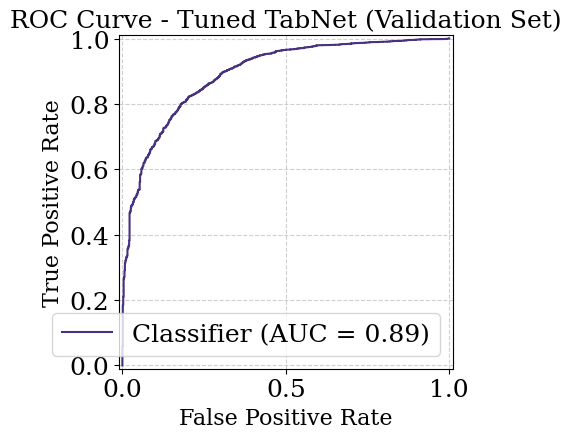

In [ ]:
# ============================================================
# 📊 VALIDATION EVALUATION - Tuned TabNet Model
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

print("\n🧩 Evaluating Tuned Model on VALIDATION SET...")

y_val_pred = final_model_tuned.predict(X_val.values)
y_val_proba = final_model_tuned.predict_proba(X_val.values)[:, 1]

acc_val = accuracy_score(y_val, y_val_pred)
prec_val = precision_score(y_val, y_val_pred, average='macro', zero_division=0)
rec_val = recall_score(y_val, y_val_pred, average='macro', zero_division=0)
f1_val = f1_score(y_val, y_val_pred, average='macro', zero_division=0)
auc_val = roc_auc_score(y_val, y_val_proba)

print(f"\n✅ Validation Metrics (Macro) with Tuned Hyperparameters:")
print(f"Accuracy : {acc_val:.4f}")
print(f"Precision (Macro): {prec_val:.4f}")
print(f"Recall (Macro)   : {rec_val:.4f}")
print(f"F1-Score (Macro) : {f1_val:.4f}")
print(f"ROC-AUC          : {auc_val:.4f}")

print("\n📋 Classification Report (VALIDATION SET):")
print(classification_report(y_val, y_val_pred, digits=4, zero_division=0))

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif", "Computer Modern Roman"],
    "mathtext.fontset": "dejavuserif",
    "axes.unicode_minus": False,
})

cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_val,
    annot=True,
    fmt='d',
    cmap=sns.color_palette(["#88D6C9", "#F9C270"]),
    cbar=False,
    annot_kws={"size": 18, "color": "black"}
)
plt.title("Confusion Matrix - Tuned TabNet (Validation Set)", fontsize=18)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("Actual Label", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

print("\n📈 ROC Curve (VALIDATION SET):")
RocCurveDisplay.from_predictions(y_val, y_val_proba)
plt.title("ROC Curve - Tuned TabNet (Validation Set)", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Resampling and Modelling

In [ ]:
import json
import os

save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'

best_params = {
    'n_steps': 6,
    'n_d': 16,
    'n_a': 10,
    'lr': 0.008858667904100823,
    'lambda_sparse': 0.00014873521072935117,
    'gamma': 1.0
}

os.makedirs(save_dir, exist_ok=True)

best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')

with open(best_params_path, 'w') as f:
    json.dump(best_params, f, indent=4)

print(f"Best hyperparameters saved to: {best_params_path}")

Best hyperparameters saved to: /content/drive/MyDrive/SEER CRC DATASET/best_tabnet_params.json


##W/O Resampling

In [ ]:
print("Distribution of the target variable in the original training data:")
display(y_train.value_counts())

Distribution of the target variable in the original training data:


SEER cause-specific death classification
1    27425
0     5421
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 52 with best_epoch = 32 and best_val_0_auc = 0.88962


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8898 | Prec_macro: 0.8309 | Rec_macro: 0.7301 | F1_macro: 0.7660 | AUC: 0.8896

🟢 Training Fold 2/5

Early stopping occurred at epoch 54 with best_epoch = 34 and best_val_0_auc = 0.88925


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.8819 | Prec_macro: 0.8245 | Rec_macro: 0.6980 | F1_macro: 0.7372 | AUC: 0.8892

🟢 Training Fold 3/5

Early stopping occurred at epoch 53 with best_epoch = 33 and best_val_0_auc = 0.88818


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8853 | Prec_macro: 0.8124 | Rec_macro: 0.7326 | F1_macro: 0.7629 | AUC: 0.8882

🟢 Training Fold 4/5

Early stopping occurred at epoch 59 with best_epoch = 39 and best_val_0_auc = 0.88826


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.8862 | Prec_macro: 0.8139 | Rec_macro: 0.7352 | F1_macro: 0.7652 | AUC: 0.8883

🟢 Training Fold 5/5

Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_auc = 0.89288


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8853 | Prec_macro: 0.8226 | Rec_macro: 0.7176 | F1_macro: 0.7537 | AUC: 0.8929

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.889812           0.830937        0.730106    0.765995  0.889618
1     2  0.881927           0.824510        0.697954    0.737186  0.889249
2     3  0.885337           0.812417        0.732600    0.762854  0.888179
3     4  0.886189           0.813885        0.735181    0.765212  0.888259
4     5  0.885337           0.822555        0.717592    0.753726  0.892884


Mean Metrics:
 Fold                 3.000000
Accuracy             0.885720
Precision (Macro)    0.820861
Recall (Macro)       0.722687
F1 (Macro)           0.756995
ROC-AUC              0.889638
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52866 | val_0_auc: 0.57139 |  0:00:02s
epoch 1  | loss: 0.38686 | val_0_auc: 0.56414 |  0:00:04s
epoch 2  | loss: 0.34852 | val_0_auc: 0.56538 |  0:00:06s
epoch 3  | loss: 0.33495 | val_0_auc: 0.6007  |  0:00:09s
epoch 4  | loss: 0.33364 | val_0_auc: 0.47966 |  0:00:11s
epoch 5  | loss: 0.31704 | val_0_auc: 0.51496 |  0:00:14s
epoch 6  | loss: 0.31361 | val_0_auc: 0.51111 |  0:00:16s
epoch 7  | loss: 0.30828 | val_0_auc: 0.51037 |  0:00:18s
epoch 8  | loss: 0.30242 | val_0_auc: 0.52486 |  0:00:20s
epoch 9  | loss: 0.30064 | val_0_auc: 0.45181 |  0:00:23s
epoch 10 | loss: 0.29843 | val_0_auc: 0.51068 |  0:00:25s
epoch 11 | loss: 0.29485 | val_0_auc: 0.46209 |  0:00:28s
epoch 12 | loss: 0.295   | val_0_auc: 0.4535  |  0:00:30s
epoch 13 | loss: 0.29137 | val_0_auc: 0.55316 |  0:00:32s
epoch 14 | loss: 0.29094 | val_0_auc: 0.58994 |  0:00:34s
epoch 15 | loss: 0.28938 | val_0_auc: 0.65332 |  0:00:37s
epoch 16 | loss: 0.28821 | val_0_auc: 0.76895 |  0:00:40s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8834
Precision (Macro): 0.8103
Recall (Macro)   : 0.7243
F1-Score (Macro) : 0.7559
ROC-AUC          : 0.8901

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.7160    0.4868    0.5796      1549
           1     0.9046    0.9618    0.9323      7837

    accuracy                         0.8834      9386
   macro avg     0.8103    0.7243    0.7559      9386
weighted avg     0.8735    0.8834    0.8741      9386



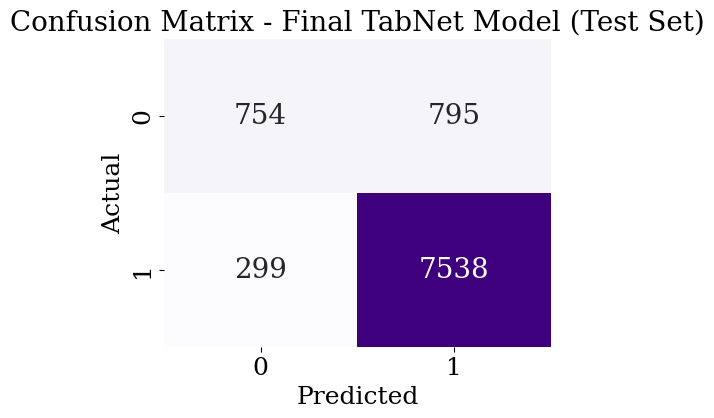

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))

X_train_np, y_train_np = X_train.values, y_train.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']),
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0
    )

    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],
        max_epochs=200, patience=20,
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )

    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']),
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# === 3️⃣ EVALUASI FINAL MODEL DI TEST SET ===
print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Training data resampled using SMOTE.")
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape: {X_train_resampled.shape}")
print("\nResampled target variable distribution:")
display(y_train_resampled.value_counts())

Training data resampled using SMOTE.
Original training data shape: (32846, 32)
Resampled training data shape: (54850, 32)

Resampled target variable distribution:


SEER cause-specific death classification
0    27425
1    27425
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 49 with best_epoch = 29 and best_val_0_auc = 0.87812


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8399 | Prec_macro: 0.7247 | Rec_macro: 0.7887 | F1_macro: 0.7477 | AUC: 0.8781

🟢 Training Fold 2/5

Early stopping occurred at epoch 40 with best_epoch = 20 and best_val_0_auc = 0.87136


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.8404 | Prec_macro: 0.7218 | Rec_macro: 0.7729 | F1_macro: 0.7416 | AUC: 0.8714

🟢 Training Fold 3/5

Early stopping occurred at epoch 52 with best_epoch = 32 and best_val_0_auc = 0.87457


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8291 | Prec_macro: 0.7131 | Rec_macro: 0.7838 | F1_macro: 0.7366 | AUC: 0.8746

🟢 Training Fold 4/5

Early stopping occurred at epoch 45 with best_epoch = 25 and best_val_0_auc = 0.87592


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.8572 | Prec_macro: 0.7427 | Rec_macro: 0.7670 | F1_macro: 0.7537 | AUC: 0.8759

🟢 Training Fold 5/5

Early stopping occurred at epoch 46 with best_epoch = 26 and best_val_0_auc = 0.87422


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8370 | Prec_macro: 0.7202 | Rec_macro: 0.7823 | F1_macro: 0.7426 | AUC: 0.8742

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.839940           0.724686        0.788731    0.747700  0.878117
1     2  0.840367           0.721849        0.772943    0.741577  0.871359
2     3  0.829071           0.713121        0.783773    0.736605  0.874572
3     4  0.857204           0.742667        0.766984    0.753654  0.875923
4     5  0.836957           0.720244        0.782286    0.742578  0.874219


Mean Metrics:
 Fold                 3.000000
Accuracy             0.840708
Precision (Macro)    0.724513
Recall (Macro)       0.778943
F1 (Macro)           0.744423
ROC-AUC              0.874838
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.58868 | val_0_auc: 0.51088 |  0:00:04s
epoch 1  | loss: 0.41648 | val_0_auc: 0.50013 |  0:00:07s
epoch 2  | loss: 0.37518 | val_0_auc: 0.4997  |  0:00:11s
epoch 3  | loss: 0.3585  | val_0_auc: 0.50222 |  0:00:15s
epoch 4  | loss: 0.34686 | val_0_auc: 0.49945 |  0:00:19s
epoch 5  | loss: 0.33879 | val_0_auc: 0.50073 |  0:00:22s
epoch 6  | loss: 0.33284 | val_0_auc: 0.49517 |  0:00:26s
epoch 7  | loss: 0.32887 | val_0_auc: 0.52445 |  0:00:30s
epoch 8  | loss: 0.3249  | val_0_auc: 0.53632 |  0:00:34s
epoch 9  | loss: 0.32355 | val_0_auc: 0.68398 |  0:00:38s
epoch 10 | loss: 0.31842 | val_0_auc: 0.7151  |  0:00:42s
epoch 11 | loss: 0.31714 | val_0_auc: 0.80914 |  0:00:46s
epoch 12 | loss: 0.31675 | val_0_auc: 0.83494 |  0:00:49s
epoch 13 | loss: 0.31128 | val_0_auc: 0.85536 |  0:00:53s
epoch 14 | loss: 0.31027 | val_0_auc: 0.86322 |  0:00:57s
epoch 15 | loss: 0.30911 | val_0_auc: 0.86248 |  0:01:01s
epoch 16 | loss: 0.31016 | val_0_auc: 0.86623 |  0:01:05s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8472
Precision (Macro): 0.7294
Recall (Macro)   : 0.7707
F1-Score (Macro) : 0.7464
ROC-AUC          : 0.8712

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.5300    0.6566    0.5865      1549
           1     0.9288    0.8849    0.9063      7837

    accuracy                         0.8472      9386
   macro avg     0.7294    0.7707    0.7464      9386
weighted avg     0.8629    0.8472    0.8535      9386



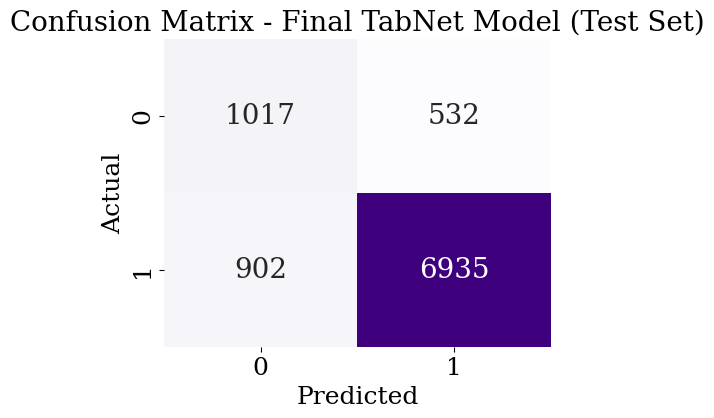

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))

X_train_np, y_train_np = X_train_resampled.values, y_train_resampled.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']),
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0
    )

    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],
        max_epochs=200, patience=20,
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )

    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']),
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# === 3️⃣ EVALUASI FINAL MODEL DI TEST SET ===
print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##SMOTEENN

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled_smoteenn, y_train_resampled_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("Training data resampled using SMOTEENN.")
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape (SMOTEENN): {X_train_resampled_smoteenn.shape}")
print("\nResampled target variable distribution (SMOTEENN):")
display(y_train_resampled_smoteenn.value_counts())

Training data resampled using SMOTEENN.
Original training data shape: (32846, 32)
Resampled training data shape (SMOTEENN): (42369, 32)

Resampled target variable distribution (SMOTEENN):


SEER cause-specific death classification
0    24236
1    18133
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 43 with best_epoch = 23 and best_val_0_auc = 0.88307


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8374 | Prec_macro: 0.7241 | Rec_macro: 0.7975 | F1_macro: 0.7489 | AUC: 0.8831

🟢 Training Fold 2/5

Early stopping occurred at epoch 42 with best_epoch = 22 and best_val_0_auc = 0.87935


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.8414 | Prec_macro: 0.7264 | Rec_macro: 0.7896 | F1_macro: 0.7493 | AUC: 0.8793

🟢 Training Fold 3/5

Early stopping occurred at epoch 42 with best_epoch = 22 and best_val_0_auc = 0.87909


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8527 | Prec_macro: 0.7392 | Rec_macro: 0.7897 | F1_macro: 0.7593 | AUC: 0.8791

🟢 Training Fold 4/5

Early stopping occurred at epoch 54 with best_epoch = 34 and best_val_0_auc = 0.87907


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.8088 | Prec_macro: 0.7033 | Rec_macro: 0.8022 | F1_macro: 0.7272 | AUC: 0.8791

🟢 Training Fold 5/5

Early stopping occurred at epoch 43 with best_epoch = 23 and best_val_0_auc = 0.88019


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8024 | Prec_macro: 0.6989 | Rec_macro: 0.8004 | F1_macro: 0.7215 | AUC: 0.8802

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.837383           0.724139        0.797549    0.748924  0.883067
1     2  0.841432           0.726413        0.789624    0.749338  0.879349
2     3  0.852728           0.739218        0.789662    0.759321  0.879090
3     4  0.808824           0.703320        0.802180    0.727156  0.879066
4     5  0.802430           0.698863        0.800420    0.721527  0.880192


Mean Metrics:
 Fold                 3.000000
Accuracy             0.828559
Precision (Macro)    0.718391
Recall (Macro)       0.795887
F1 (Macro)           0.741253
ROC-AUC              0.880153
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.49455 | val_0_auc: 0.51225 |  0:00:03s
epoch 1  | loss: 0.32323 | val_0_auc: 0.50841 |  0:00:06s
epoch 2  | loss: 0.28074 | val_0_auc: 0.51933 |  0:00:09s
epoch 3  | loss: 0.25832 | val_0_auc: 0.51341 |  0:00:11s
epoch 4  | loss: 0.24879 | val_0_auc: 0.52437 |  0:00:15s
epoch 5  | loss: 0.23616 | val_0_auc: 0.52122 |  0:00:18s
epoch 6  | loss: 0.23313 | val_0_auc: 0.53107 |  0:00:20s
epoch 7  | loss: 0.2253  | val_0_auc: 0.61496 |  0:00:23s
epoch 8  | loss: 0.22125 | val_0_auc: 0.52647 |  0:00:27s
epoch 9  | loss: 0.21749 | val_0_auc: 0.53699 |  0:00:30s
epoch 10 | loss: 0.2165  | val_0_auc: 0.56199 |  0:00:32s
epoch 11 | loss: 0.20998 | val_0_auc: 0.69537 |  0:00:35s
epoch 12 | loss: 0.20571 | val_0_auc: 0.8229  |  0:00:38s
epoch 13 | loss: 0.20448 | val_0_auc: 0.82458 |  0:00:42s
epoch 14 | loss: 0.20036 | val_0_auc: 0.84327 |  0:00:44s
epoch 15 | loss: 0.19907 | val_0_auc: 0.85393 |  0:00:47s
epoch 16 | loss: 0.19845 | val_0_auc: 0.87123 |  0:00:50s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8042
Precision (Macro): 0.6992
Recall (Macro)   : 0.7988
F1-Score (Macro) : 0.7222
ROC-AUC          : 0.8784

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.4472    0.7908    0.5714      1549
           1     0.9513    0.8068    0.8731      7837

    accuracy                         0.8042      9386
   macro avg     0.6992    0.7988    0.7222      9386
weighted avg     0.8681    0.8042    0.8233      9386



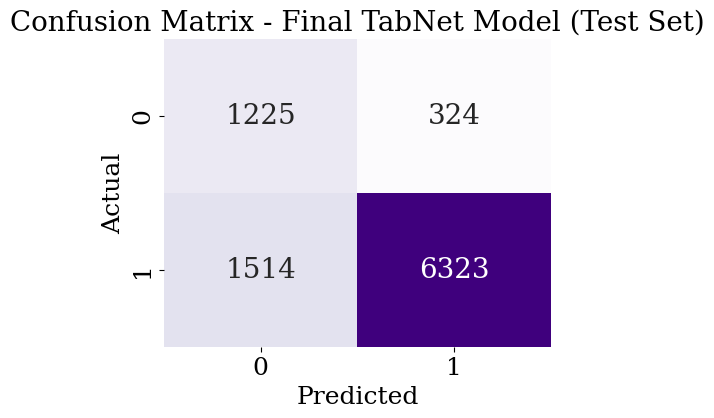

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))


X_train_np, y_train_np = X_train_resampled_smoteenn.values, y_train_resampled_smoteenn.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']),
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0
    )

    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],
        max_epochs=200, patience=20,
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )
    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']),
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##ENN


In [6]:
!pip install -U imbalanced-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 9.6 MB/s eta 0:00:00


In [7]:
from imblearn.under_sampling import EditedNearestNeighbours as ENN

enn = ENN(n_neighbors=3, kind_sel='all', n_jobs=-1)
X_train_resampled_ENN, y_train_resampled_ENN = enn.fit_resample(X_train, y_train)

print("✅ Training data resampled using ENN.")
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape (ENN): {X_train_resampled_ENN.shape}")
print("\nResampled target variable distribution (ENN):")
display(y_train_resampled_ENN.value_counts())


✅ Training data resampled using ENN.
Original training data shape: (32846, 32)
Resampled training data shape (ENN): (25912, 32)

Resampled target variable distribution (ENN):


SEER cause-specific death classification
1    20491
0     5421
Name: count, dtype: int64

Loaded Best Hyperparameters:
{
    "n_steps": 6,
    "n_d": 16,
    "n_a": 10,
    "lr": 0.008858667904100823,
    "lambda_sparse": 0.00014873521072935117,
    "gamma": 1.0
}

🟢 Training Fold 1/5

Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_auc = 0.88905


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 1 | Acc: 0.8623 | Prec_macro: 0.7515 | Rec_macro: 0.7830 | F1_macro: 0.7654 | AUC: 0.8891

🟢 Training Fold 2/5

Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_0_auc = 0.57561


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 2 | Acc: 0.5899 | Prec_macro: 0.5422 | Rec_macro: 0.5748 | F1_macro: 0.5083 | AUC: 0.5756

🟢 Training Fold 3/5

Early stopping occurred at epoch 60 with best_epoch = 40 and best_val_0_auc = 0.88783


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 3 | Acc: 0.8585 | Prec_macro: 0.7466 | Rec_macro: 0.7890 | F1_macro: 0.7643 | AUC: 0.8878

🟢 Training Fold 4/5

Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_auc = 0.69707


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 4 | Acc: 0.7012 | Prec_macro: 0.5870 | Rec_macro: 0.6352 | F1_macro: 0.5882 | AUC: 0.6971

🟢 Training Fold 5/5

Early stopping occurred at epoch 63 with best_epoch = 43 and best_val_0_auc = 0.88756


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Fold 5 | Acc: 0.8651 | Prec_macro: 0.7558 | Rec_macro: 0.7852 | F1_macro: 0.7689 | AUC: 0.8876

📊 K-Fold Validation Metrics (evaluated on VAL set):


Fold  Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)   ROC-AUC
0     1  0.862319           0.751502        0.782986    0.765375  0.889052
1     2  0.589940           0.542163        0.574827    0.508288  0.575607
2     3  0.858483           0.746568        0.788968    0.764294  0.887832
3     4  0.701194           0.587042        0.635249    0.588171  0.697066
4     5  0.865090           0.755827        0.785163    0.768907  0.887561


Mean Metrics:
 Fold                 3.000000
Accuracy             0.775405
Precision (Macro)    0.676620
Recall (Macro)       0.713439
F1 (Macro)           0.679007
ROC-AUC              0.787424
dtype: float64

🚀 Training Final Model on Full TRAIN SET...


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.55398 | val_0_auc: 0.3874  |  0:00:01s
epoch 1  | loss: 0.37139 | val_0_auc: 0.56269 |  0:00:03s
epoch 2  | loss: 0.32751 | val_0_auc: 0.50567 |  0:00:06s
epoch 3  | loss: 0.3022  | val_0_auc: 0.53446 |  0:00:08s
epoch 4  | loss: 0.29301 | val_0_auc: 0.38547 |  0:00:10s
epoch 5  | loss: 0.28599 | val_0_auc: 0.59356 |  0:00:12s
epoch 6  | loss: 0.28154 | val_0_auc: 0.48375 |  0:00:14s
epoch 7  | loss: 0.27281 | val_0_auc: 0.68361 |  0:00:16s
epoch 8  | loss: 0.26931 | val_0_auc: 0.48031 |  0:00:18s
epoch 9  | loss: 0.2703  | val_0_auc: 0.58113 |  0:00:20s
epoch 10 | loss: 0.26467 | val_0_auc: 0.45176 |  0:00:22s
epoch 11 | loss: 0.26338 | val_0_auc: 0.61546 |  0:00:24s
epoch 12 | loss: 0.26334 | val_0_auc: 0.67623 |  0:00:26s
epoch 13 | loss: 0.25605 | val_0_auc: 0.6591  |  0:00:28s
epoch 14 | loss: 0.25935 | val_0_auc: 0.72018 |  0:00:29s
epoch 15 | loss: 0.25311 | val_0_auc: 0.71787 |  0:00:32s
epoch 16 | loss: 0.25255 | val_0_auc: 0.69384 |  0:00:34s
epoch 17 | los

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



🧪 Evaluating Final Model on TEST SET...

✅ Final Test Metrics (Macro):
Accuracy : 0.8650
Precision (Macro): 0.7559
Recall (Macro)   : 0.7907
F1-Score (Macro) : 0.7710
ROC-AUC          : 0.8885

📋 Classification Report (TEST SET):
              precision    recall  f1-score   support

           0     0.5773    0.6798    0.6244      1549
           1     0.9344    0.9016    0.9177      7837

    accuracy                         0.8650      9386
   macro avg     0.7559    0.7907    0.7710      9386
weighted avg     0.8755    0.8650    0.8693      9386



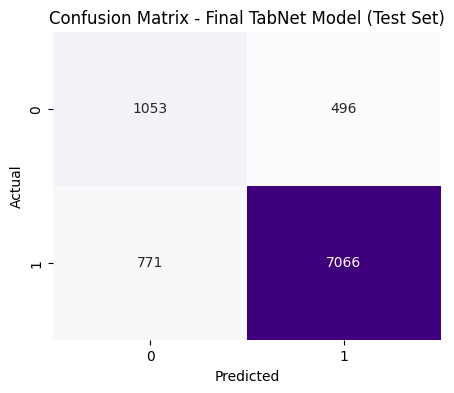

In [8]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

save_dir = '/content/drive/MyDrive/SEER CRC DATASET/'
best_params_path = os.path.join(save_dir, 'best_tabnet_params.json')
with open(best_params_path, 'r') as f:
    best_params = json.load(f)

print("Loaded Best Hyperparameters:")
print(json.dumps(best_params, indent=4))

X_train_np, y_train_np = X_train_resampled_ENN.values, y_train_resampled_ENN.values
X_val_np, y_val_np = X_val.values, y_val.values
X_test_np, y_test_np = X_test.values, y_test.values

# === 1️⃣ K-FOLD CROSS VALIDATION DI TRAIN SET ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np, y_train_np)):
    print(f"\n🟢 Training Fold {fold+1}/5")

    X_train_fold, X_val_fold = X_train_np[train_idx], X_train_np[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]

    model = TabNetClassifier(
        n_d=best_params['n_d'],
        n_a=best_params['n_a'],
        n_steps=best_params['n_steps'],
        gamma=best_params['gamma'],
        lambda_sparse=best_params['lambda_sparse'],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=best_params['lr']),
        scheduler_params={"step_size": 50, "gamma": 0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax',
        seed=42 + fold,
        verbose=0
    )
    model.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_val_np, y_val_np)],
        max_epochs=200, patience=20,
        batch_size=1024, virtual_batch_size=128,
        num_workers=0, drop_last=False
    )

    y_pred_val = model.predict(X_val_np)
    y_proba_val = model.predict_proba(X_val_np)[:, 1]

    report = classification_report(y_val_np, y_pred_val, output_dict=True, zero_division=0)
    acc = accuracy_score(y_val_np, y_pred_val)
    prec_macro = report["macro avg"]["precision"]
    rec_macro = report["macro avg"]["recall"]
    f1_macro = report["macro avg"]["f1-score"]
    auc = roc_auc_score(y_val_np, y_proba_val)

    fold_metrics.append({
        'Fold': fold + 1,
        'Accuracy': acc,
        'Precision (Macro)': prec_macro,
        'Recall (Macro)': rec_macro,
        'F1 (Macro)': f1_macro,
        'ROC-AUC': auc
    })

    print(f"✅ Fold {fold+1} | Acc: {acc:.4f} | Prec_macro: {prec_macro:.4f} | "
          f"Rec_macro: {rec_macro:.4f} | F1_macro: {f1_macro:.4f} | AUC: {auc:.4f}")

cv_df = pd.DataFrame(fold_metrics)
print("\n📊 K-Fold Validation Metrics (evaluated on VAL set):")
display(cv_df)
print("\nMean Metrics:\n", cv_df.mean(numeric_only=True))

# === 2️⃣ LATIH MODEL FINAL DI TRAIN SET PENUH ===
print("\n🚀 Training Final Model on Full TRAIN SET...")
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params['lr']),
    scheduler_params={"step_size": 50, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42,
    verbose=1
)

final_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=200, patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0, drop_last=False
)

# === 3️⃣ EVALUASI FINAL MODEL DI TEST SET ===
print("\n🧪 Evaluating Final Model on TEST SET...")
y_pred_test = final_model.predict(X_test_np)
y_proba_test = final_model.predict_proba(X_test_np)[:, 1]

report_test = classification_report(y_test_np, y_pred_test, output_dict=True, zero_division=0)
acc = accuracy_score(y_test_np, y_pred_test)
prec_macro = report_test["macro avg"]["precision"]
rec_macro = report_test["macro avg"]["recall"]
f1_macro = report_test["macro avg"]["f1-score"]
auc = roc_auc_score(y_test_np, y_proba_test)

print(f"\n✅ Final Test Metrics (Macro):")
print(f"Accuracy : {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"Recall (Macro)   : {rec_macro:.4f}")
print(f"F1-Score (Macro) : {f1_macro:.4f}")
print(f"ROC-AUC          : {auc:.4f}")

print("\n📋 Classification Report (TEST SET):")
print(classification_report(y_test_np, y_pred_test, digits=4, zero_division=0))

cm = confusion_matrix(y_test_np, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Final TabNet Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Baseline Model


##W/O Tuning

🚀 Evaluating Baseline Models with Macro Metrics...


--- 🔹 Training and Evaluating Logistic Regression ---
Accuracy         : 0.8453
Precision (Macro): 0.7209
Recall (Macro)   : 0.7318
F1-Score (Macro) : 0.7261
ROC-AUC          : 0.8437

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.5295    0.5623    0.5454      1549
           1     0.9124    0.9012    0.9068      7837

    accuracy                         0.8453      9386
   macro avg     0.7209    0.7318    0.7261      9386
weighted avg     0.8492    0.8453    0.8471      9386



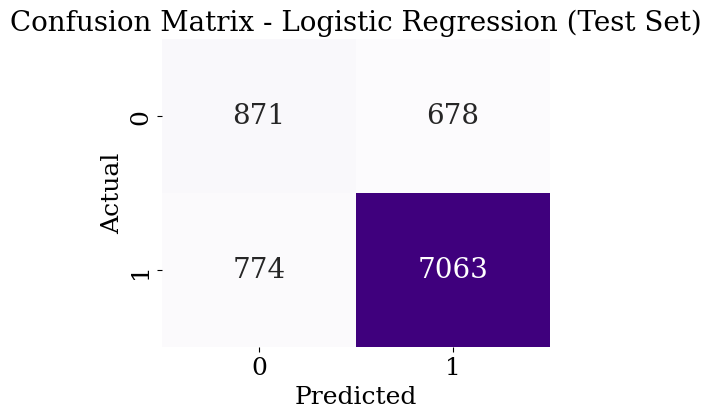


--- 🔹 Training and Evaluating Decision Tree ---
Accuracy         : 0.8008
Precision (Macro): 0.6776
Recall (Macro)   : 0.7416
F1-Score (Macro) : 0.6970
ROC-AUC          : 0.7416

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.4316    0.6533    0.5198      1549
           1     0.9237    0.8299    0.8743      7837

    accuracy                         0.8008      9386
   macro avg     0.6776    0.7416    0.6970      9386
weighted avg     0.8425    0.8008    0.8158      9386



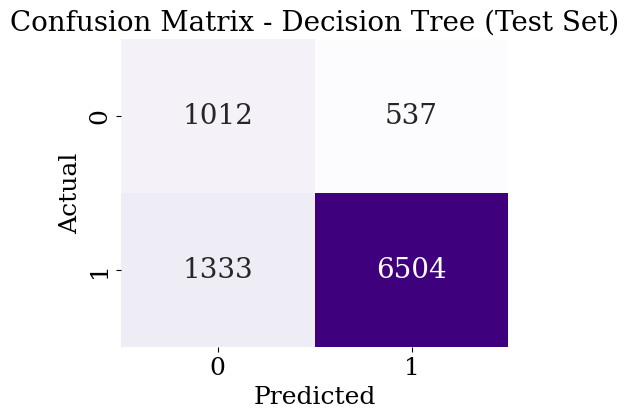


--- 🔹 Training and Evaluating Random Forest ---
Accuracy         : 0.8556
Precision (Macro): 0.7422
Recall (Macro)   : 0.7851
F1-Score (Macro) : 0.7600
ROC-AUC          : 0.8787

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.5507    0.6798    0.6085      1549
           1     0.9336    0.8904    0.9115      7837

    accuracy                         0.8556      9386
   macro avg     0.7422    0.7851    0.7600      9386
weighted avg     0.8704    0.8556    0.8615      9386



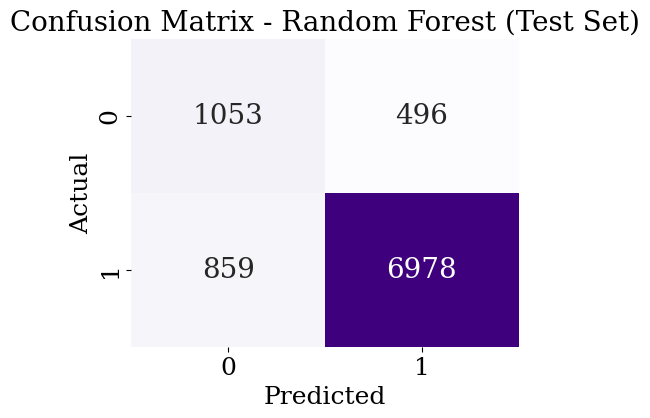


--- 🔹 Training and Evaluating K-Nearest Neighbors ---
Accuracy         : 0.8144
Precision (Macro): 0.6872
Recall (Macro)   : 0.7381
F1-Score (Macro) : 0.7054
ROC-AUC          : 0.7951

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.4546    0.6243    0.5261      1549
           1     0.9198    0.8520    0.8846      7837

    accuracy                         0.8144      9386
   macro avg     0.6872    0.7381    0.7054      9386
weighted avg     0.8431    0.8144    0.8254      9386



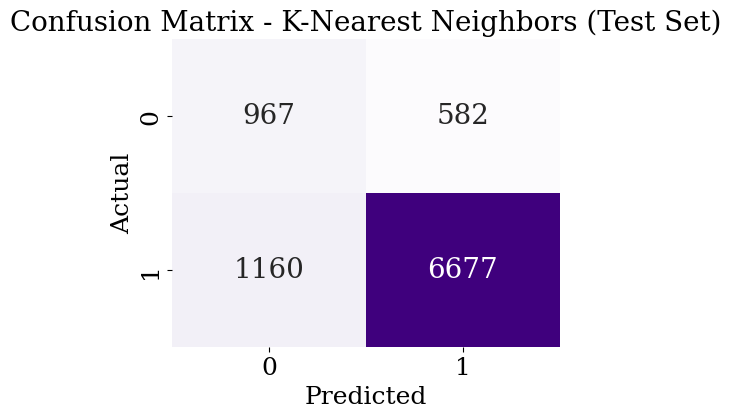


--- 🔹 Training and Evaluating Gaussian Naive Bayes ---
Accuracy         : 0.8080
Precision (Macro): 0.6806
Recall (Macro)   : 0.7340
F1-Score (Macro) : 0.6988
ROC-AUC          : 0.8250

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.4421    0.6236    0.5174      1549
           1     0.9190    0.8445    0.8802      7837

    accuracy                         0.8080      9386
   macro avg     0.6806    0.7340    0.6988      9386
weighted avg     0.8403    0.8080    0.8203      9386



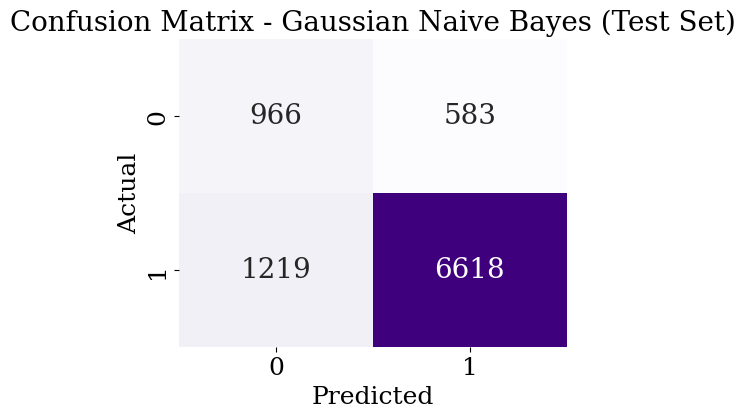


📊 Summary of Baseline Model Results (Macro Metrics, Test Set):


Accuracy  Precision (Macro)  Recall (Macro)  \
Random Forest         0.855636           0.742184        0.785093   
Logistic Regression   0.845302           0.720949        0.731768   
Gaussian Naive Bayes  0.808012           0.680572        0.734042   
K-Nearest Neighbors   0.814404           0.687227        0.738129   
Decision Tree         0.800767           0.677644        0.741617   

                      F1-Score (Macro)   ROC-AUC  
Random Forest                 0.759998  0.878708  
Logistic Regression           0.726095  0.843742  
Gaussian Naive Bayes          0.698789  0.825015  
K-Nearest Neighbors           0.705360  0.795113  
Decision Tree                 0.697043  0.741617

/tmp/ipython-input-3523641059.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['F1-Score (Macro)'], palette="viridis")


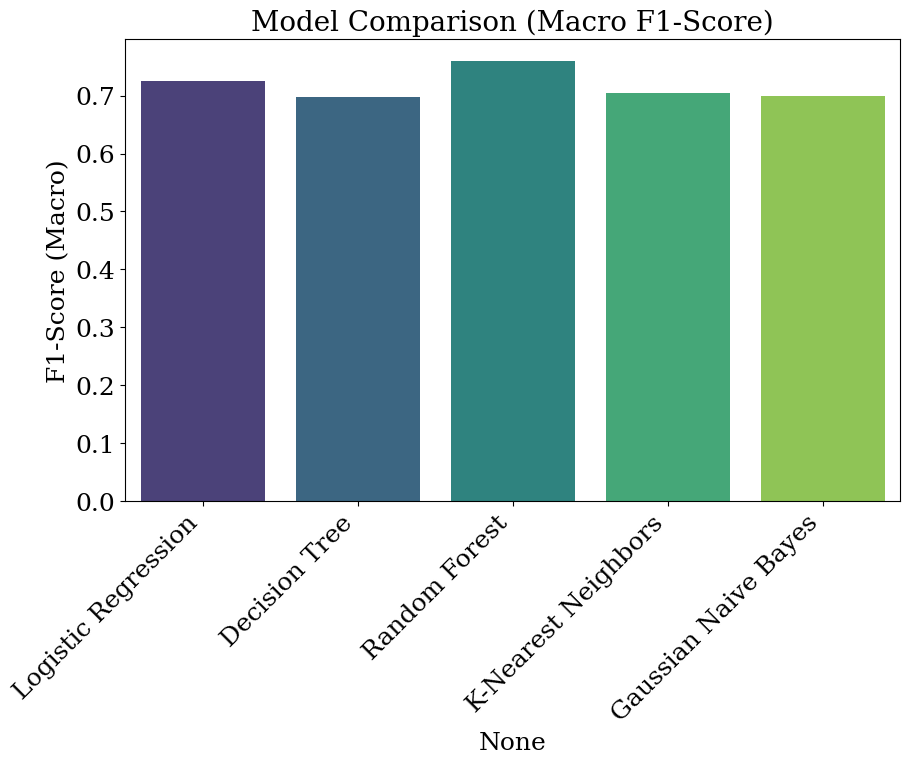

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1️⃣ Define Baseline Models ===
baseline_models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

results = {}
print("🚀 Evaluating Baseline Models with Macro Metrics...\n")

# Avoid column names with invalid characters
X_train_safe = X_train_resampled_ENN.copy()
X_test_safe = X_test.copy()
X_train_safe.columns = [f"f{i}" for i in range(X_train_safe.shape[1])]
X_test_safe.columns = X_train_safe.columns

# === 3️⃣ Loop through Models ===
for name, model in baseline_models.items():
    print(f"\n--- 🔹 Training and Evaluating {name} ---")

    # Train the model
    model.fit(X_train_use, y_train_resampled_ENN)

    # Predict
    y_pred = model.predict(X_test_use)
    y_proba = model.predict_proba(X_test_use)[:, 1]

    # Macro metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_proba)

    # Save metrics
    results[name] = {
        'Accuracy': acc,
        'Precision (Macro)': prec,
        'Recall (Macro)': rec,
        'F1-Score (Macro)': f1,
        'ROC-AUC': auc
    }

    # Display metrics
    print(f"Accuracy         : {acc:.4f}")
    print(f"Precision (Macro): {prec:.4f}")
    print(f"Recall (Macro)   : {rec:.4f}")
    print(f"F1-Score (Macro) : {f1:.4f}")
    print(f"ROC-AUC          : {auc:.4f}")

    # Classification Report
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# === 4️⃣ Summary Table of All Models ===
print("\n📊 Summary of Baseline Model Results (Macro Metrics, Test Set):")
results_df = pd.DataFrame(results).T
display(results_df.sort_values(by='ROC-AUC', ascending=False))

# Optional Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df['F1-Score (Macro)'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Model Comparison (Macro F1-Score)")
plt.ylabel("F1-Score (Macro)")
plt.show()


##W/ Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Avoid column names with invalid characters
X_train_safe = X_train_resampled_ENN.copy()
X_test_safe = X_test.copy()
X_train_safe.columns = [f"f{i}" for i in range(X_train_safe.shape[1])]
X_test_safe.columns = X_train_safe.columns


# === 1️⃣ Define Baseline Models and Parameter Grids ===
# GaussianNB biasanya tidak di-tuning, tapi kita berikan var_smoothing agar tetap ada proses pencarian.
baseline_configs = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, solver='liblinear'),
        "params": {
            'C': np.logspace(-4, 4, 20),
            'penalty': ['l1', 'l2']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'max_depth': [None, 5, 10, 15, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'max_features': ['sqrt', 'log2']
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    "Gaussian Naive Bayes": {
        "model": GaussianNB(),
        "params": {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    }
}

results = {}
print("🚀 Evaluating Tuned Baseline Models (Fair Comparison)...\n")

# === 2️⃣ Loop through Models with Randomized Search ===
for name, config in baseline_configs.items():
    print(f"\n--- 🔹 Tuning and Evaluating {name} ---")

    # Inisialisasi RandomizedSearchCV (300 iterasi atau maksimal kombinasi yang tersedia)
    # Gunakan scoring='f1_macro' agar sesuai dengan target optimasi TabNet Anda
    n_iter_search = 300 if name != "Gaussian Naive Bayes" else 100

    search = RandomizedSearchCV(
        config["model"],
        param_distributions=config["params"],
        n_iter=n_iter_search,
        cv=5,
        scoring='f1_macro',
        random_state=42,
        n_jobs=-1
    )

    # Train (Tuning)
    search.fit(X_train_safe, y_train_resampled_ENN)

    # Ambil model terbaik
    best_model = search.best_estimator_
    print(f"✅ Best Params: {search.best_params_}")

    # Predict
    y_pred = best_model.predict(X_test_safe)
    y_proba = best_model.predict_proba(X_test_safe)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc = roc_auc_score(y_test, y_proba)

    # Save results
    results[name] = {
        'Accuracy': acc,
        'Precision (Macro)': prec,
        'Recall (Macro)': rec,
        'F1-Score (Macro)': f1,
        'ROC-AUC': auc,
        'Best Params': search.best_params_
    }

    print(f"F1-Score (Macro) : {f1:.4f} | ROC-AUC: {auc:.4f}")

# === 3️⃣ Summary Table ===
results_df = pd.DataFrame(results).T.drop(columns='Best Params')
display(results_df.sort_values(by='F1-Score (Macro)', ascending=False))

🚀 Evaluating Tuned Baseline Models (Fair Comparison)...


--- 🔹 Tuning and Evaluating Logistic Regression ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=300. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best Params: {'penalty': 'l1', 'C': np.float64(545.5594781168514)}
F1-Score (Macro) : 0.7271 | ROC-AUC: 0.8450

--- 🔹 Tuning and Evaluating Decision Tree ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 108 is smaller than n_iter=300. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best Params: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
F1-Score (Macro) : 0.7354 | ROC-AUC: 0.8277

--- 🔹 Tuning and Evaluating Random Forest ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 96 is smaller than n_iter=300. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 30}
F1-Score (Macro) : 0.7629 | ROC-AUC: 0.8812

--- 🔹 Tuning and Evaluating K-Nearest Neighbors ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 28 is smaller than n_iter=300. Running 28 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Best Params: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}
F1-Score (Macro) : 0.6931 | ROC-AUC: 0.7779

--- 🔹 Tuning and Evaluating Gaussian Naive Bayes ---
✅ Best Params: {'var_smoothing': np.float64(1.873817422860387e-09)}
F1-Score (Macro) : 0.6986 | ROC-AUC: 0.8250


Accuracy Precision (Macro) Recall (Macro)  \
Random Forest         0.857873          0.745419       0.787209   
Decision Tree          0.83827          0.717355       0.763039   
Logistic Regression   0.844982          0.720813       0.734166   
Gaussian Naive Bayes  0.807799          0.680359       0.733914   
K-Nearest Neighbors   0.799382          0.674393        0.73509   

                     F1-Score (Macro)   ROC-AUC  
Random Forest                0.762921  0.881219  
Decision Tree                 0.73542  0.827676  
Logistic Regression          0.727088  0.844956  
Gaussian Naive Bayes         0.698576  0.825019  
K-Nearest Neighbors          0.693128  0.777893

#Interpret


In [11]:
print(dir(final_model))

['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__update__', '__weakref__', '_build_request_for_signature', '_callback_container', '_check_feature_names', '_check_n_features', '_compute_feature_importances', '_construct_loaders', '_default_loss', '_default_metric', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_metric_container_dict', '_metrics', '_metrics_names', '_more_tags', '_optimizer', '_predict_batch',

## Global

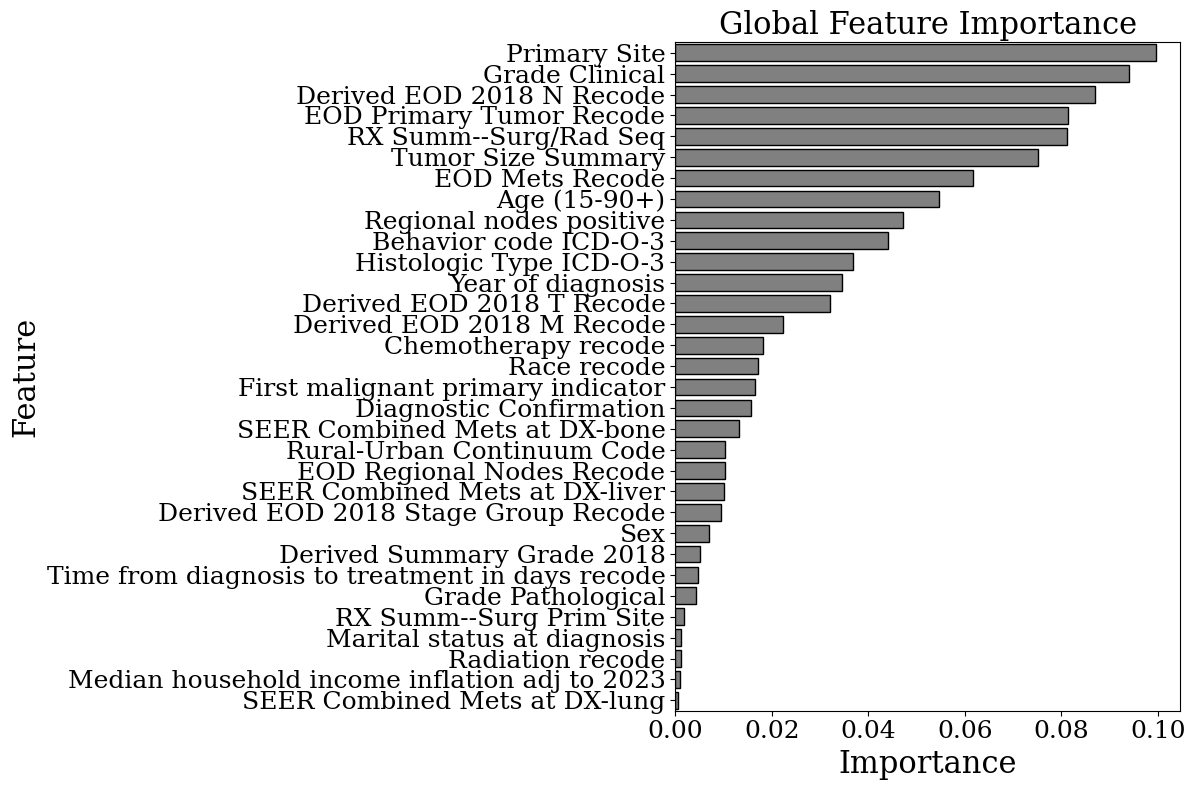

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern", "Times New Roman", "DejaVu Serif"],
    "mathtext.fontset": "cm",
    "axes.unicode_minus": False
})

# === Global Feature Importance ===
explain_matrix, masks = final_model.explain(X_test_np)

feature_names = X_test.columns

step_keys = sorted(masks.keys())
step_means = []

for k in step_keys:
    step_means.append(masks[k].mean(axis=0))

global_importance = np.mean(np.vstack(step_means), axis=0)


global_importance_df = pd.DataFrame({
    "Feature": cleaned_feature_names,
    "Importance": global_importance
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(
    global_importance_df["Feature"],
    global_importance_df["Importance"],
    color='gray',
    edgecolor='black'
)
plt.gca().invert_yaxis()

plt.title(r'Global Feature Importance', fontsize=22)
plt.xlabel(r'Importance', fontsize=22)
plt.ylabel(r'Feature', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

## Lokal


📊 Local Feature Importance Plots (for the first 5 test samples):


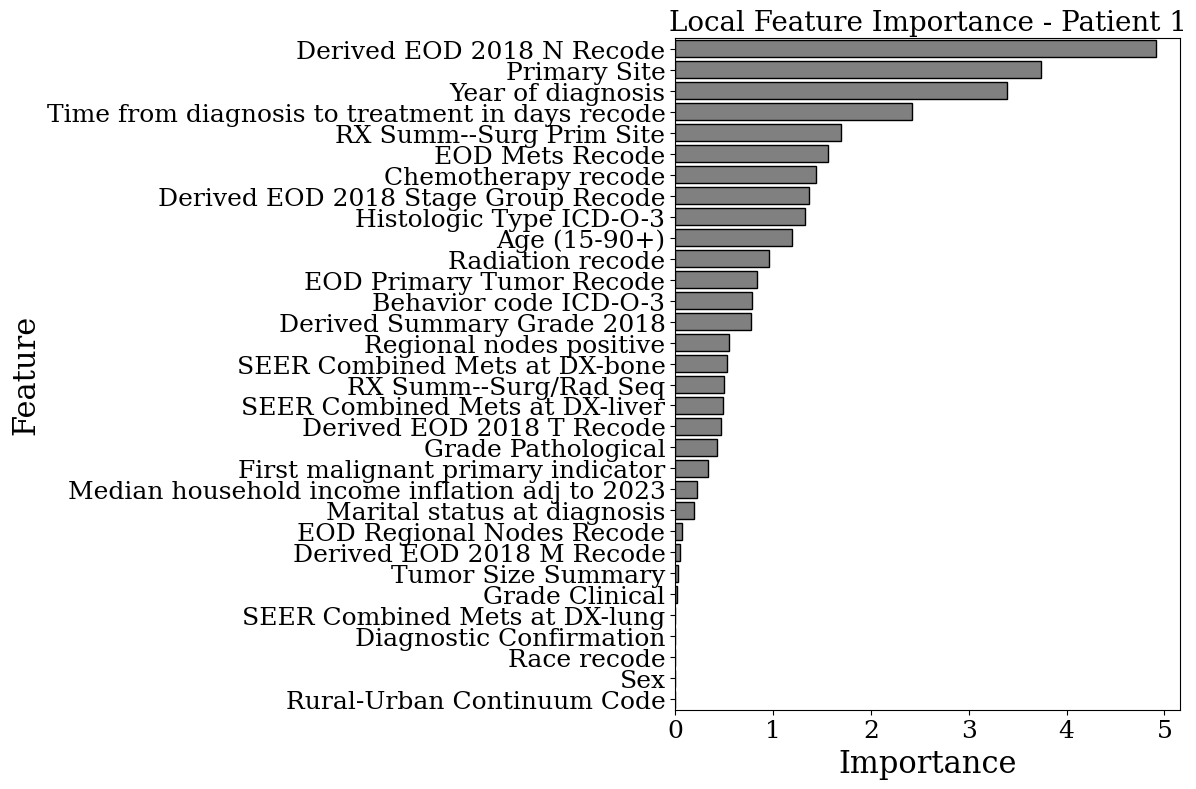

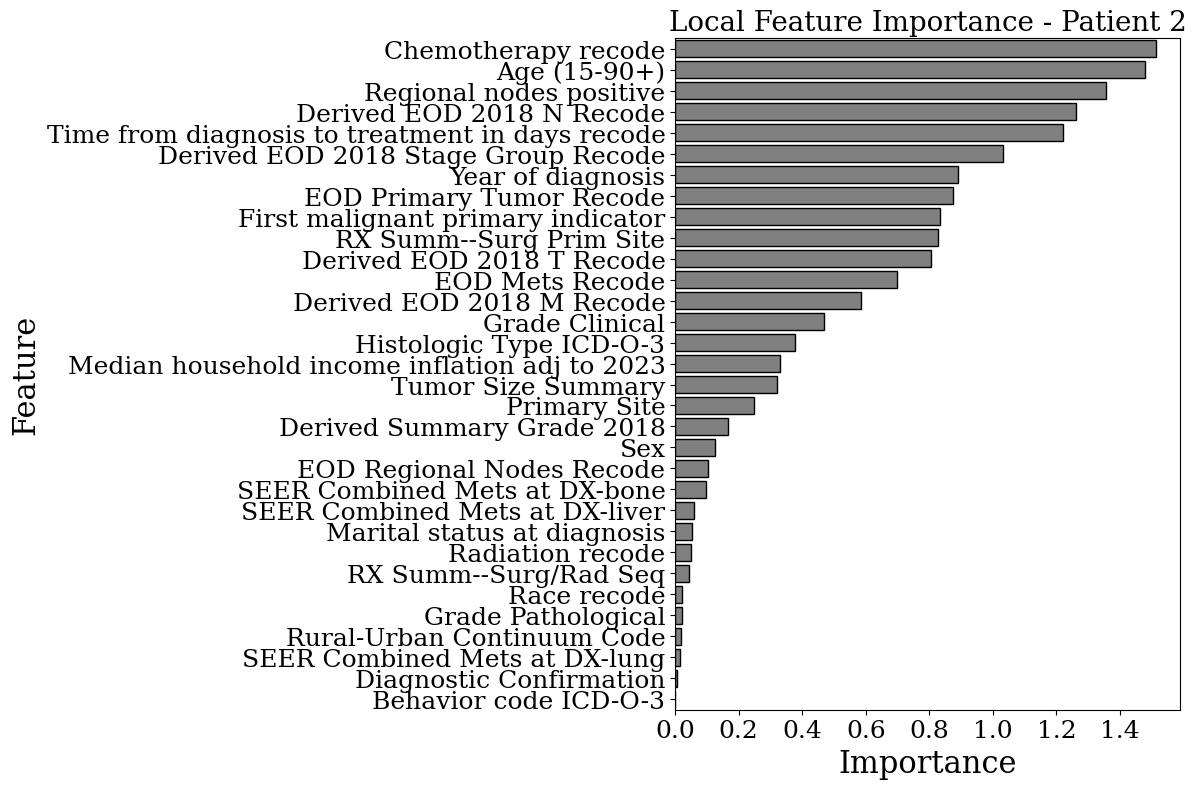

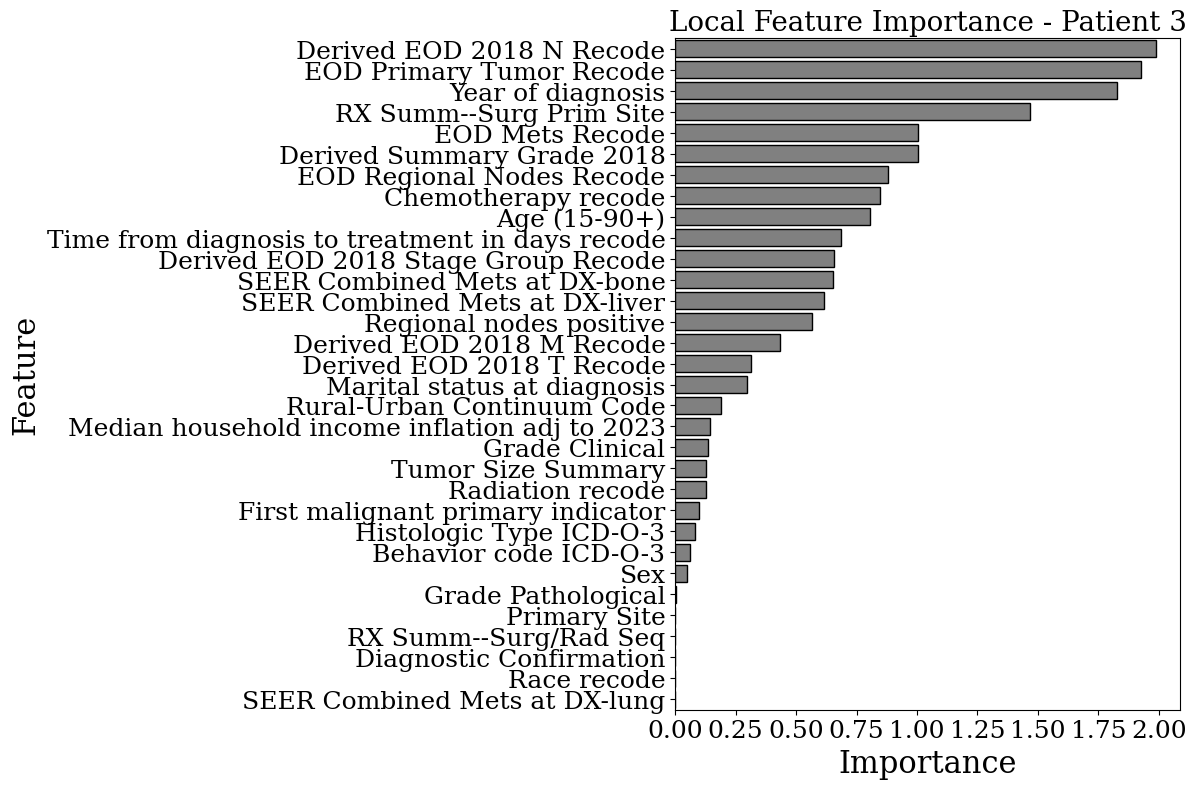

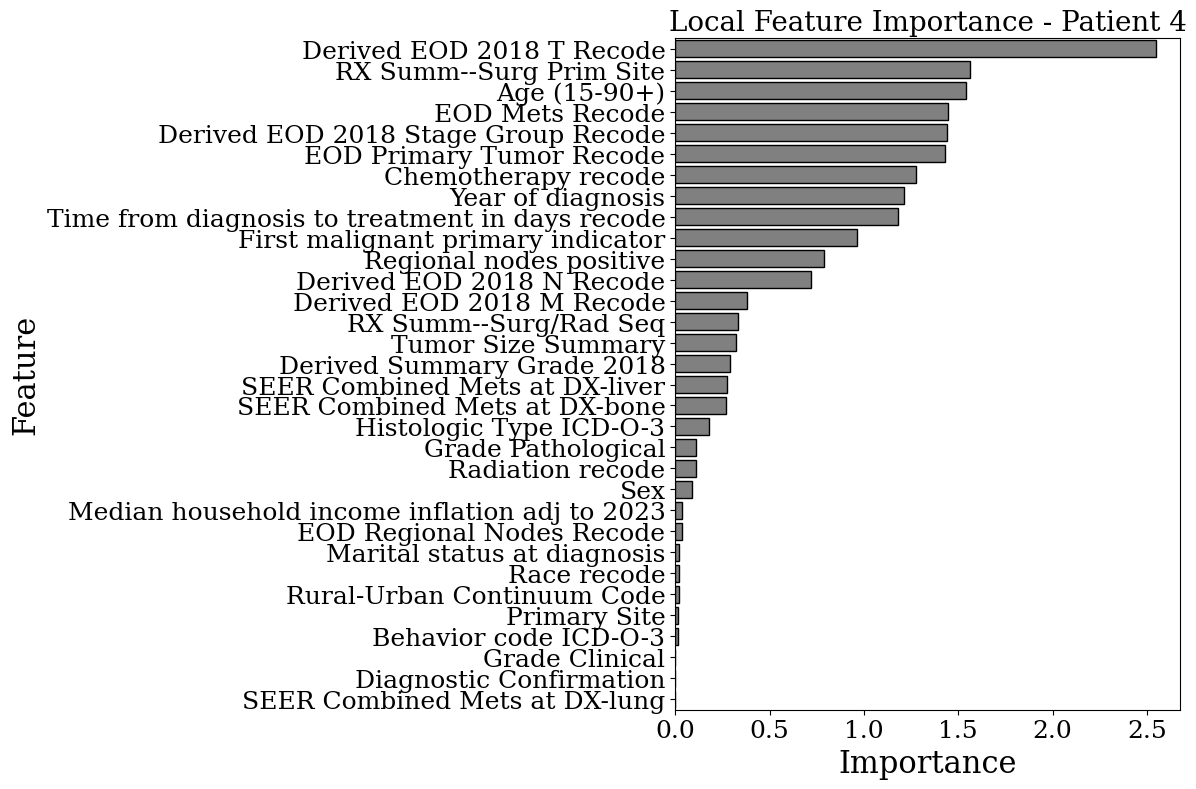

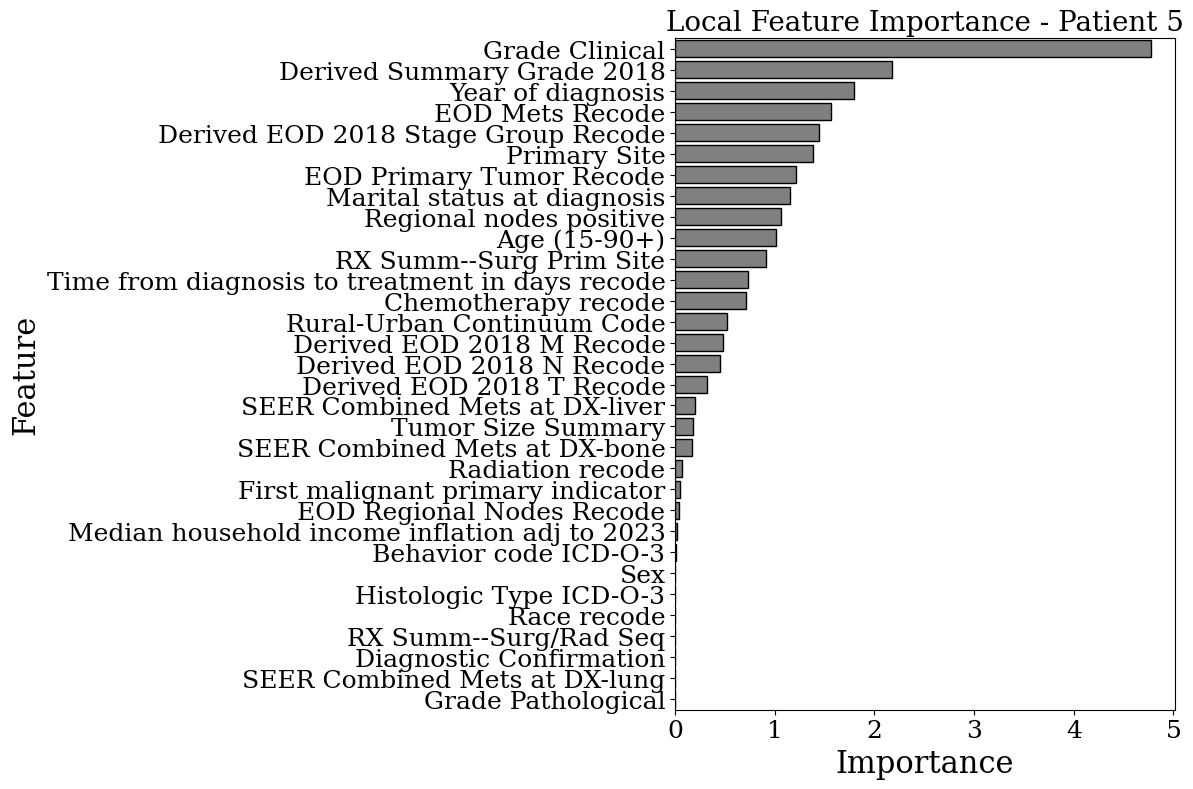

In [13]:
# === Local Feature Importance (Top 5 Samples) ===
print("\n📊 Local Feature Importance Plots (for the first 5 test samples):")
for i in range(5):
    local_importance_df = pd.DataFrame({
        'Feature': cleaned_feature_names,
        'Importance': explain_matrix[i]
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=local_importance_df,
        color='gray',
        edgecolor='black'
    )

    plt.title(rf'Local Feature Importance - Patient {i+1}', fontsize=20)
    plt.xlabel(r'Importance', fontsize=22)
    plt.ylabel(r'Feature', fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.show()

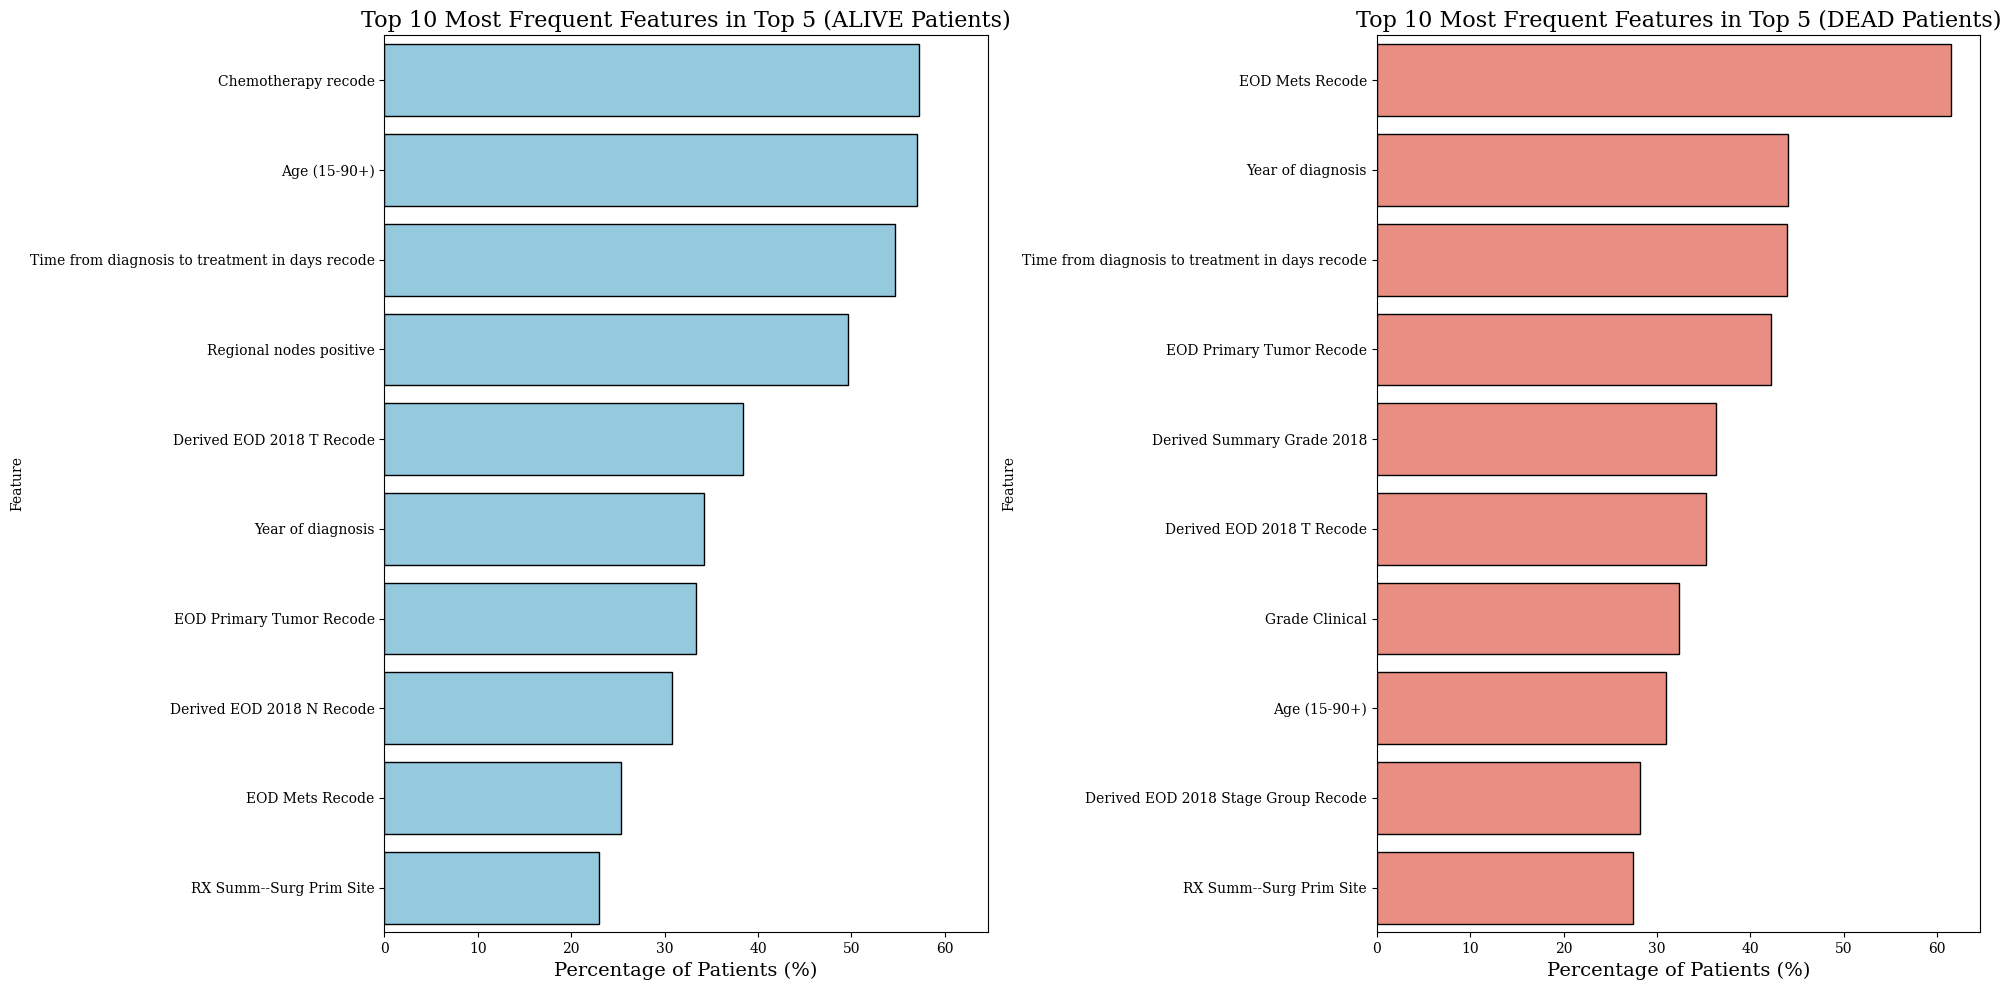

Total Sampel Analisis: Alive (3918), Dead (774)

Top 5 Fitur yang paling sering muncul pada Pasien ALIVE:
                                           Feature  Percentage
2                              Chemotherapy recode   57.197550
0                                     Age (15-90+)   57.044410
3  Time from diagnosis to treatment in days recode   54.670750
7                          Regional nodes positive   49.668198
4                        Derived EOD 2018 T Recode   38.386932

Top 5 Fitur yang paling sering muncul pada Pasien DEAD:
                                            Feature  Percentage
4                                   EOD Mets Recode   61.498708
12                                Year of diagnosis   44.056848
0   Time from diagnosis to treatment in days recode   43.927649
5                          EOD Primary Tumor Recode   42.248062
15                       Derived Summary Grade 2018   36.304910


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

indices_alive = np.where(y_test.values == 1)[0]
indices_dead = np.where(y_test.values == 0)[0]

sample_alive = np.random.choice(indices_alive, size=len(indices_alive)//2, replace=False)
sample_dead = np.random.choice(indices_dead, size=len(indices_dead)//2, replace=False)

def get_top_features_frequency(indices, explain_matrix, feature_names, top_n=5):
    feature_counter = Counter()
    for idx in indices:
        local_imp = explain_matrix[idx]
        top_indices = np.argsort(local_imp)[-top_n:]
        for i in top_indices:
            feature_counter[feature_names[i]] += 1

    df = pd.DataFrame(feature_counter.items(), columns=['Feature', 'Frequency'])
    df['Percentage'] = (df['Frequency'] / len(indices)) * 100
    return df.sort_values(by='Frequency', ascending=False)

# Hitung frekuensi fitur top 5 untuk kedua grup
df_freq_alive = get_top_features_frequency(sample_alive, explain_matrix, cleaned_feature_names)
df_freq_dead = get_top_features_frequency(sample_dead, explain_matrix, cleaned_feature_names)

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

# Plot untuk Grup Alive
sns.barplot(x='Percentage', y='Feature', data=df_freq_alive.head(10), ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 Most Frequent Features in Top 5 (ALIVE Patients)', fontsize=16)
axes[0].set_xlabel('Percentage of Patients (%)', fontsize=14)

# Plot untuk Grup Dead
sns.barplot(x='Percentage', y='Feature', data=df_freq_dead.head(10), ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Top 10 Most Frequent Features in Top 5 (DEAD Patients)', fontsize=16)
axes[1].set_xlabel('Percentage of Patients (%)', fontsize=14)

plt.tight_layout()
plt.show()

print(f"Total Sampel Analisis: Alive ({len(sample_alive)}), Dead ({len(sample_dead)})")
print("\nTop 5 Fitur yang paling sering muncul pada Pasien ALIVE:")
print(df_freq_alive.head(5)[['Feature', 'Percentage']])

print("\nTop 5 Fitur yang paling sering muncul pada Pasien DEAD:")
print(df_freq_dead.head(5)[['Feature', 'Percentage']])